<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Kaggle Ranking - SF - TEAM_3</h2>
<h4>Codathon @ Hult</h4>
<br>
Hult International Business School<br>
<h4>Team Members</h4>
<br>
Gino
<br>
Htet Aung Kyaw
<br>
Jorge Nistal
<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

In [5]:
# importing critical libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas                      as pd             # data science essentials
import matplotlib.pyplot           as plt            # essential graphical output
import seaborn                     as sns            # enhanced graphical output
import statsmodels.formula.api     as smf            # regression modeling
import numpy                       as np             # mathematical essentials
import sklearn.linear_model                          # linear modeling in scikit-learn
from sklearn.model_selection import train_test_split # train/test split
from sklearn.tree import plot_tree                   # tree plots
from sklearn.model_selection import RandomizedSearchCV # hyperparameter tuning
from sklearn.ensemble import GradientBoostingRegressor # gbm
from sklearn.linear_model import LogisticRegression  #logistic regression
from sklearn.ensemble import RandomForestClassifier  #Random Forest
from sklearn.metrics import accuracy_score            #roc_auc_score scoring
from sklearn.metrics import confusion_matrix         #confusion matrix
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.ensemble import GradientBoostingClassifier #gradient boosting


pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)
pd.set_option('display.max_colwidth',100)

# Input data files are available in the read-only "../input/" directory
import os
for dirname, _, filenames in os.walk('/VS_Code/Spotify/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))       

/VS_Code/Spotify/.cache
/VS_Code/Spotify/spotify_combine.csv
/VS_Code/Spotify/spotify_test.ipynb
/VS_Code/Spotify/submission_Team_3.csv
/VS_Code/Spotify/submission_Team_3_04.csv
/VS_Code/Spotify/submission_Team_3_05.csv
/VS_Code/Spotify/submission_Team_3_06.csv
/VS_Code/Spotify/submission_Team_3_07.csv
/VS_Code/Spotify/submission_Team_3_08.csv
/VS_Code/Spotify/submission_Team_3_09.csv
/VS_Code/Spotify/submission_Team_3_10.csv
/VS_Code/Spotify/submission_Team_3_11.csv
/VS_Code/Spotify/submission_Team_3_12.csv
/VS_Code/Spotify/submission_Team_3_13.csv
/VS_Code/Spotify/submission_Team_3_14.csv
/VS_Code/Spotify/team_3_2023041701.ipynb
/VS_Code/Spotify/team_3_2023041901.ipynb
/VS_Code/Spotify/team_3_2023041902.ipynb
/VS_Code/Spotify/team_3_2023042001.ipynb
/VS_Code/Spotify/team_3_2023042002.ipynb
/VS_Code/Spotify/team_3_2023042003.ipynb
/VS_Code/Spotify/test.csv
/VS_Code/Spotify/test.ipynb
/VS_Code/Spotify/train.csv
/VS_Code/Spotify/vaccines.csv
/VS_Code/Spotify/vaccines.ipynb


In [501]:
# Define functions

########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()


########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train_1.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Transported_Importance.png')

Let's Import and read the datasets from the train and test excel files.

In [6]:
# importing the training dataset
path             = "./"
training_dataset = "train.csv"

# reading in the .csv file with pandas
spotify_train    = pd.read_csv(filepath_or_buffer = path + training_dataset)

# checking basic info about the dataset
spotify_train.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20553 entries, 0 to 20552
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             20553 non-null  object 
 1   artist            20553 non-null  object 
 2   uri               20553 non-null  object 
 3   danceability      20553 non-null  float64
 4   energy            20553 non-null  float64
 5   key               20553 non-null  int64  
 6   loudness          20553 non-null  float64
 7   mode              20553 non-null  int64  
 8   speechiness       20553 non-null  float64
 9   acousticness      20553 non-null  float64
 10  instrumentalness  20553 non-null  float64
 11  liveness          20553 non-null  float64
 12  valence           20553 non-null  float64
 13  tempo             20553 non-null  float64
 14  duration_ms       20553 non-null  int64  
 15  time_signature    20553 non-null  int64  
 16  chorus_hit        20553 non-null  float6

In [7]:
# importing the training dataset
path             = "./"
testing_dataset  = 'test.csv'

# importing the testing dataset
spotify_test = pd.read_csv(filepath_or_buffer = path + testing_dataset)

# checking basic info about the dataset
spotify_test.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20553 entries, 0 to 20552
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             20553 non-null  object 
 1   artist            20553 non-null  object 
 2   uri               20553 non-null  object 
 3   danceability      20553 non-null  float64
 4   energy            20553 non-null  float64
 5   key               20553 non-null  int64  
 6   loudness          20553 non-null  float64
 7   mode              20553 non-null  int64  
 8   speechiness       20553 non-null  float64
 9   acousticness      20553 non-null  float64
 10  instrumentalness  20553 non-null  float64
 11  liveness          20553 non-null  float64
 12  valence           20553 non-null  float64
 13  tempo             20553 non-null  float64
 14  duration_ms       20553 non-null  int64  
 15  time_signature    20553 non-null  int64  
 16  chorus_hit        20553 non-null  float6

<h2>Joining The Data and Handling Missing Values</h2>
<br>
<br>
We join the data so that we can get a good picture of the whole dataset.

In [8]:
#Setting the colums for joining the two datasets
spotify_train['set'] = 'Training'
spotify_test ['set'] = 'Testing'

# concatenating both datasets together for mv and feature engineering
spotify_df = spotify_train.append(other = spotify_test)

# resetting index to avoid problems later in the code
spotify_df.reset_index(drop = False,
                       inplace = True)

C:\Users\hboyz\AppData\Local\Temp\ipykernel_16952\2117879577.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  spotify_df = spotify_train.append(other = spotify_test)


In [ ]:
# Export combined dataframe to csv, to visualize in Tableau
spotify_df.to_csv("spotify_combine.csv")

In [ ]:
# Check missing values in the combine dataframe
spotify_df.isnull().sum()

index                   0
track                   0
artist                  0
uri                     0
danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
duration_ms             0
time_signature          0
chorus_hit              0
sections                0
Hit_or_Flop         20553
Era                     0
id                      0
set                     0
dtype: int64

In [515]:
# !pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Set up Spotipy credentials
client_id = '0f329c0a8fa04c00acf337d9963b7d2d'
client_secret = 'd4ff5a00c39245079c9744eac0583233'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


# Define a function to get the track ID for a given track and artist
def get_track_id(track_name, artist_name):
    query = f"{track_name} artist:{artist_name}"
    result = sp.search(q=query, type='track', limit=1)
    if result['tracks']['items']:
        track_id = result['tracks']['items'][0]['id']
        return track_id
    else:
        return None

# Define a function to get genre information for a given track and artist
def get_genre(track_name, artist_name):
    track_id = get_track_id(track_name, artist_name)
    if track_id:
        result = sp.track(track_id)
        if 'genres' in result['artists'][0]:
            genre = result['artists'][0]['genres']
            return genre
        else:
            return None
    else:
        return None


# Example usage
track_name = 'Shape of You'
artist_name = 'Ed Sheeran'
genre = get_genre(track_name, artist_name)
print(genre)

spotify_df["Genre"] = 0
for index, values in spotify_df.iterrows():
    spotify_df.loc[index,"Genre"] = get_genre(spotify_df.loc[index,"track"], spotify_df.loc[index,"artist"])
        





# Define a function to get genre information for a single track
# def get_genre(track_id):
#     try:
#         result = sp.track(track_id)
#         genre = result['artists'][0]['genres']
#         return genre
#     except:
#         return None

# # Use the function to get genre information for each track in the dataframe
# spotify_df['Genre'] = spotify_df['track'].apply(get_genre)

# Save the updated dataframe to a new file
# spotify_df[["id","track","Genre"]].to_csv('music_list_with_genre.csv', index=True)

None


In [ ]:
spotify_df[["id","track","Genre"]].to_csv('music_list_with_genre.csv', index=True)

,id,track
0,20953,Tender Lover
1,30386,Seven Years
2,39282,Boy With Luv
3,37222,It's All Gone
4,24866,Beng Beng Beng
...,...,...
41101,32458,Let's Rock Shall We
41102,5965,Magic Moon (Clair De Lune)
41103,8142,Go Cry On Somebody Else's Shoulder
41104,8405,Downtown


In [ ]:
print(spotify_df[spotify_df.Era == '00s'].loudness.mean())
print(spotify_df[spotify_df.Era == '10s'].loudness.mean())
print(spotify_df[spotify_df.Era == '60s'].loudness.mean())
print(spotify_df[spotify_df.Era == '70s'].loudness.mean())
print(spotify_df[spotify_df.Era == '80s'].loudness.mean())
print(spotify_df[spotify_df.Era == '90s'].loudness.mean())

-7.449258004087193
-7.589796342607064
-12.029726452210136
-11.734270023177958
-11.041894180660105
-10.2351115942029


In [ ]:
print(spotify_df[spotify_df.artist == 'Pitbull'].loudness.mean())
print(spotify_df[spotify_df.artist == 'Babyface'].loudness.mean())
print(spotify_df[spotify_df.artist == 'Saosin'].loudness.mean())
print(spotify_df[spotify_df.artist == 'Justin Bieber'].loudness.mean())

-6.437
-7.219416666666667
-4.535
-6.454095238095238


In [ ]:
# hit_artists = []
# for artist, group in spotify_train.groupby('artist'):
#     if group['Hit_or_Flop'].max() == 1:
#         hit_artists.append(artist)
        
# Group by artist and check if all songs by each artist are hits.
hit_artists = []
for artist, group in spotify_train.groupby('artist'):
    if group['Hit_or_Flop'].sum() /  group['Hit_or_Flop'].count() == 1:
        hit_artists.append(artist)

# Definir la función para añadir la columna "famous_artist"
def is_famous(artist):
    if artist in hit_artists:
        return 1
    else:
        return 0

# Añadir la columna "famous_artist" a la base de datos
spotify_df['famous_artist'] = spotify_df['artist'].apply(lambda x: is_famous(x))
print(spotify_df.famous_artist.sum())
print(spotify_df.Hit_or_Flop.sum())

# for artist in hit_artists:
#    print(artist)




17598
10292.0


In [ ]:
#!pip install billboard.py
import billboard

chart = billboard.ChartData('hot-100')
chart.title
song = chart[0]
song.title
song.artist
song.weeks
print(chart)

hot-100 chart from 2023-04-22
-----------------------------
1. 'Last Night' by Morgan Wallen
2. 'Search & Rescue' by Drake
3. 'Flowers' by Miley Cyrus
4. 'Kill Bill' by SZA
5. 'Creepin'' by Metro Boomin, The Weeknd & 21 Savage
6. 'Calm Down' by Rema & Selena Gomez
7. 'Die For You' by The Weeknd & Ariana Grande
8. 'Boy's A Liar, Pt. 2' by PinkPantheress & Ice Spice
9. 'Anti-Hero' by Taylor Swift
10. 'Ella Baila Sola' by Eslabon Armado X Peso Pluma
11. 'Rock And A Hard Place' by Bailey Zimmerman
12. 'Players' by Coi Leray
13. 'You Proof' by Morgan Wallen
14. 'Favorite Song' by Toosii
15. 'Sure Thing' by Miguel
16. 'Lavender Haze' by Taylor Swift
17. 'La Bebe' by Yng Lvcas x Peso Pluma
18. 'As It Was' by Harry Styles
19. 'Thought You Should Know' by Morgan Wallen
20. 'Thinkin' Bout Me' by Morgan Wallen
21. 'I'm Good (Blue)' by David Guetta & Bebe Rexha
22. 'One Thing At A Time' by Morgan Wallen
23. 'Fast Car' by Luke Combs
24. 'Under The Influence' by Chris Brown
25. 'Something In The Ora

In [ ]:
# spotify_df.artist.str.find('Justin')
famous_artist = [
'Harry Belafonte',                        
'Jerry Goldsmith',                        
'P. Susheela',                            
'Vicente Fern√°ndez',                     
'Ennio Morricone',                        
'Ant√¥nio Carlos Jobim',                  
'Philip Glass',                           
'Frank Zappa',                            
'Gilberto Gil',                           
'Giacomo Puccini',                        
'MPB4',                                   
'Raimon',                                 
'The Stooges',                            
'Joan Manuel Serrat',                     
'Stan Getz',                              
'Javier Sol√≠s',                          
'Iggy Pop',                               
'Madonna',                                
'Silvio Rodr√≠guez',                      
'John Coltrane',                          
'Nobuo Uematsu',                          
'Stevie Wonder',                          
'Gerald Wilson Orchestra',                
'Captain Beefheart & His Magic Band',     
'Taylor Swift',                           
'The Rolling Stones',                     
'Glee Cast',                              
'Elmer Bernstein',                        
'kalapana',                               
'Brian Eno',                              
'Elton John',                             
'Buzzcocks',                              
'Drake',                                  
'Giuseppe Verdi',                         
'Tito Puente',                            
'Aretha Franklin',                        
'The Temptations',                        
'The Beatles',                            
'Reginaldo Rossi',                        
'The Beach Boys',                         
'Chicago',                                
'Neil Diamond',                           
'Maurice Jarre',                          
'Kenny Chesney',                          
'Rod Stewart',                            
'Connie Francis',                         
'Gal Costa',                              
'Ton Steine Scherben',                    
'John Fahey',                             
'Charles Mingus',                         
'Dionne Warwick',                         
'Michael Jackson',                        
'R. Stevie Moore',                        
'Billy Joel',                             
'Malcolm Arnold',                         
'Stephen Sondheim',                       
'Keith Urban',                            
'Tim McGraw',                             
'The Cleaners From Venus',                
'Scott Walker',                           
'Diana Ross',                             
'Brad Paisley',                           
'Charles Aznavour',                       
'Serge Gainsbourg',                       
'Sisters of Mercy',                       
'Ary Lobo',                               
'George Strait',                          
'Fran√ßois de Roubaix',                   
'Ricky Skaggs',                           
'Tito Rodriguez',                         
'Destruction',                            
'Johann Sebastian Bach',                  
'Fran√ßoise Hardy',                       
'La Sonora Matancera',                    
'Mike Seeger',                            
'Leno e Lilian',                          
'Journey',                                
'Victor Jara',                            
'Four Tops',                              
'Bobby Vee',                              
'De Wolfe Music',                         
'Skinny Puppy',                           
'Miles Davis',                            
'Milton Nascimento',                      
'Roberto Carlos',                         
'Toby Keith',                             
'Momus',                                  
'Bill Evans',                             
'Wolfgang Ambros',                        
'Wire',                                   
'The Spinners',                           
'Piero Piccioni',                         
'Heart',                                  
'Sam Cooke',                              
'Brenda Lee',                             
'Bobby Vinton',                           
'√âric Serra',                            
'Willie Col√≥n',                          
'Marin√™s E Sua Gente',                   
'Carrie Underwood',                       
'The Impressions',                        
'YELLOW MAGIC ORCHESTRA',                 
'Johnny Pearson',                         
'Los Rebeldes',                           
'The Bonzo Dog Band',                     
'Marvin Gaye',                            
'Bee Gees',                               
'John Barry',                             
'U2',                                     
'Barbra Streisand',                       
'Bon Jovi',                               
'Georges Delerue',                        
'Vladimir Cosma',                         
'Elvis Presley',                          
'Kenny Rogers',                           
'Barry Manilow',                          
'The Supremes',                           
'David Bowie',                            
'Kool & The Gang',                        
'Eminem',                                 
'Giovanni Fusco',                         
'Bruce Springsteen',                      
'Claude Bolling',                         
'Daniel Johnston',                        
'Danny Elfman',                           
'Rihanna',                                
'Brook Benton',                           
'Guided By Voices',                       
'Cher',                                   
'Anne Murray',                            
'Fleetwood Mac',                          
'The Damned',                             
'The Cramps',                             
'Styx',                                   
'The Drifters',                           
'Linda Ronstadt',                         
'John Hartford',                          
'Luis Miguel',                            
'Eric B. & Rakim',                        
'Jorge Ben Jor',                          
'Aerosmith',                              
'Olivia Newton-John',                     
'John Denver',                            
'Eddie Money',                            
'Luis Enrique',                           
'Novembers Doom',                         
'Genesis',                                
'The Who',                                
'Death In June',                          
'Francis Lai',                            
'Earth, Wind & Fire',                     
'Whitney Houston',                        
'The Bluegrass Album Band',               
'The Weeknd',                             
'Andy Williams',                          
'Throbbing Gristle',                      
'Luke Bryan',                             
'Boytronic',                              
'Alexandre Desplat',                      
'Michel Legrand',                         
'James Brown',                            
'Joe Simon',                              
'Foreigner',                              
'Glen Campbell',                          
'Joe Tex',                                
'Gaetano Donizetti',                      
'The Doobie Brothers',                    
'Laurence Vanay',                         
'Duran Duran',                            
'Slime',                                  
'Zohar Argov',                            
'Steven Halpern',                         
'Etta James',                             
'Gene Pitney',                            
'Gabby Pahinui',                          
'Dead Can Dance',                         
'Bobby Darin',                            
'Hiphop Tamizha',                         
'Survivor',                               
'Helen Reddy',                            
'Joe Satriani',                           
'Keith Mansfield',                        
'Tom Jones',                              
'Kenny Loggins',                          
'Otis Redding',                           
'Caetano Veloso',                         
'Andr√© Hossein',                         
'KISS',                                   
'Celia Cruz',                             
'Britney Spears',                         
'Brooks & Dunn',                          
'Phil Collins',                           
'The Paul Butterfield Blues Band',        
'Nausea',                                 
'Nico',                                   
'Nelson Gon√ßalves',                      
'Running Wild',                           
'The Pogues',                             
'Al Green'              
]

In [ ]:
famous_artist

['Harry Belafonte',
 'Jerry Goldsmith',
 'P. Susheela',
 'Vicente Fern√°ndez',
 'Ennio Morricone',
 'Ant√¥nio Carlos Jobim',
 'Philip Glass',
 'Frank Zappa',
 'Gilberto Gil',
 'Giacomo Puccini',
 'MPB4',
 'Raimon',
 'The Stooges',
 'Joan Manuel Serrat',
 'Stan Getz',
 'Javier Sol√≠s',
 'Iggy Pop',
 'Madonna',
 'Silvio Rodr√≠guez',
 'John Coltrane',
 'Nobuo Uematsu',
 'Stevie Wonder',
 'Gerald Wilson Orchestra',
 'Captain Beefheart & His Magic Band',
 'Taylor Swift',
 'The Rolling Stones',
 'Glee Cast',
 'Elmer Bernstein',
 'kalapana',
 'Brian Eno',
 'Elton John',
 'Buzzcocks',
 'Drake',
 'Giuseppe Verdi',
 'Tito Puente',
 'Aretha Franklin',
 'The Temptations',
 'The Beatles',
 'Reginaldo Rossi',
 'The Beach Boys',
 'Chicago',
 'Neil Diamond',
 'Maurice Jarre',
 'Kenny Chesney',
 'Rod Stewart',
 'Connie Francis',
 'Gal Costa',
 'Ton Steine Scherben',
 'John Fahey',
 'Charles Mingus',
 'Dionne Warwick',
 'Michael Jackson',
 'R. Stevie Moore',
 'Billy Joel',
 'Malcolm Arnold',
 'Stephen S

In [34]:
famous_artist_100 = spotify_df.groupby(by="artist",).agg("count")["Hit_or_Flop"].sort_values(ascending=False).head(100).index

In [ ]:
# for name in famous_artist_500:
#     print(name)

famous_artist_500

Index(['Traditional', 'Harry Belafonte', 'Jerry Goldsmith', 'P. Susheela', 'Vicente Fern√°ndez', 'Ennio Morricone', 'Ant√¥nio Carlos Jobim', 'Philip Glass', 'Frank Zappa', 'Gilberto Gil',
       ...
       'Silver Apples', 'Little River Band', 'Dinah Washington', 'Sleater-Kinney', 'Sleeping At Last', 'Steve Winwood', 'Sonny & Cher', 'Big Joe Williams', 'Erik Satie', 'Raymond Scott'], dtype='object', name='artist', length=500)

In [ ]:
#save this code to visualize the data
view= spotify_train[(spotify_train.loc[:,'Hit_or_Flop']) == 1]\
#                 [(titanic_df.loc[:,'NumFamily']) == ]\
#                 [(titanic_df.loc[:,'Side']) == 'P']\
                
view1= view.groupby(by = ['artist'])['tack_num',].sum()
tot_for_v = view1.sum()
ratio     = (view1 / tot_for_v) * 100

# view
view1["tack_num"].sort_values(ascending=False)
# tot_for_v
# ratio

KeyError: "Columns not found: 'tack_num'"

In [35]:
# hit_artists = []
# for artist, group in spotify_train.groupby('artist'):
#     if group['Hit_or_Flop'].max() == 1:
#         hit_artists.append(artist)
        
# Group by artist and check if all songs by each artist are hits.
# hit_artists = []
# for artist, group in spotify_train.groupby('artist'):
#     if group['Hit_or_Flop'].sum() /  group['Hit_or_Flop'].count() == 1:
#         hit_artists.append(artist)``

hit_artists = []
max_names = 5000 # maximum number of names to add to the list

for artist, group in spotify_train.groupby('artist'):
    if group['Hit_or_Flop'].sum() / group['Hit_or_Flop'].count() == 1:
    # if group['Hit_or_Flop'].max() == 1:
        hit_artists.append(artist)
        
    if len(hit_artists) == max_names: # stop adding names once the list reaches 1000 names
        break


# Definir la función para añadir la columna "famous_artist"
def is_famous(artist):
    if artist in hit_artists:
        return 1
    else:
        return 0

# convert 'artist' column to a Categorical data type
spotify_df['artist'] = pd.Categorical(spotify_df['artist'])

# assign a unique number to each category
spotify_df['artist_code'] = spotify_df['artist'].cat.codes 


# # Añadir la columna "famous_artist" a la base de datos
# spotify_train['famous_artist'] = spotify_train['artist'].apply(lambda x: is_famous(x))
# spotify_train.head(5)
# print(spotify_df["famous_artist"].sum())
print(spotify_df["Hit_or_Flop"].sum())

10292.0


In [ ]:
spotify_df

NameError: name 'spotify_df' is not defined

In [12]:
from collections import Counter

# convert 'artist' column to a Categorical data type
spotify_df['artist'] = pd.Categorical(spotify_df['artist'])

# assign a unique number to each category
spotify_df['artist_code'] = spotify_df['artist'].cat.codes 

In [36]:
prepositions = [
    'about', 'above', 'across', 'after', 'against', 'along', 'among', 'around', 'at', 'before',
    'behind', 'below', 'beneath', 'beside', 'between', 'beyond', 'but', 'by', 'concerning', 'considering',
    'despite', 'down', 'during', 'except', 'for', 'from', 'in', 'inside', 'into', 'like', 'near', 'of',
    'off', 'on', 'onto', 'out', 'outside', 'over', 'past', 'regarding', 'round', 'since', 'through',
    'throughout', 'to', 'toward', 'under', 'underneath', 'until', 'unto', 'up', 'upon', 'with', 'within',
    'without', 'the'
]

pronouns = [
    'i', 'you', 'he', 'she', 'it', 'we', 'they', 'me', 'him', 'her', 'us', 'them', 'your',
    'mine', 'yours', 'his', 'hers', 'its', 'ours', 'theirs', 
    'myself', 'yourself', 'himself', 'herself', 'itself', 'ourselves', 'yourselves', 'themselves', 
    'this', 'that', 'these', 'those', 
    'who', 'whom', 'whose', 'which', 'what', 
    'where', 'when', 'that', 'my'
]

# filter the hit songs
hit_songs = spotify_train[spotify_train['Hit_or_Flop'] == 1]

# concatenate the track names into a single string
hit_tracks_str = ' '.join(hit_songs['track'])

# convert the string to lowercase
hit_tracks_str = hit_tracks_str.lower()

# count the occurrence of each word
word_counts = Counter(hit_tracks_str.split())

# sort the dictionary by count in descending order
sorted_word_counts = dict(sorted(word_counts.items(), key=lambda x: x[1], reverse=True))

# extract the top N words with the highest counts, excluding prepositions and pronouns
top_n = 200
top_words = []
for word in sorted_word_counts:
    if word not in prepositions and word not in pronouns:
        top_words.append(word)
        if len(top_words) >= top_n:
            break

print(top_words)

['love', 'a', "don't", 'be', 'and', 'is', 'all', 'do', "i'm", 'time', 'one', 'little', "can't", 'get', 'heart', 'girl', 'go', 'good', 'baby', 'no', "it's", 'back', 'man', 'way', 'if', 'got', 'let', 'want', 'life', 'make', 'night', 'take', 'know', 'can', 'world', 'away', 'just', 'how', 'so', 'never', 'come', 'song', 'have', "you're", 'rock', 'wanna', 'tonight', 'are', 'now', 'right', 'more', 'home', 'again', "i'll", 'gonna', 'say', 'day', 'not', 'there', 'only', 'too', 'here', 'woman', 'eyes', 'mind', 'thing', 'dance', 'need', 'give', "ain't", 'last', 'was', 'u', 'boy', 'see', 'sweet', 'rain', 'forever', 'tell', 'stop', 'better', '&', 'music', 'bad', "let's", 'hold', 'hot', 'will', 'blue', 'keep', 'fool', 'new', 'lonely', 'still', 'long', 'lady', 'something', 'am', 'feel', 'people', 'cry', 'fire', 'crazy', 'call', 'talk', 'ever', 'girls', 'la', 'look', 'big', "she's", 'ride', 'everything', 'kiss', 'always', 'live', 'gone', 'young', 'fall', 'been', 'every', 'stay', 'turn', 'dream', 'ange

In [14]:
top_word_manual = ['love', 'time', 'little', 'one', 'heart', 'girl', 'good', 'baby', 'back', 'man', 'way', 'night', 'life', 'world', 'song', 'never', 'rock', 'wanna', 'tonight', 'home', 'right', 'again', 'day', 'woman', 'eyes', 'mind', 'dance', 'need', 'give', 'last', 'boy', 'sweet', 'rain', 'forever', 'better', 'music', 'hot', 'fool', 'lonely', 'lady', 'something', 'feel', 'people', 'kiss', 'dream', 'angel', 'goodbye', 'touch', 'party', 'roll', 'black', 'light', 'lover', 'fly', 'happy', 'friend', 'money', 'miss', 'beautiful', 'believe', 'summer']
len(top_word_manual)

61

In [ ]:
len(hit_artists)

4305

In [ ]:
spotify_df.artist.count()

41106

In [37]:

#creating binary for the column transported
spotify_df["danceability_tuned"] = 0
spotify_df["energy_tuned"] = 0
spotify_df["loudness_tuned"] = 0
spotify_df["acousticness_tuned"] = 0
spotify_df["valence_tuned"] = 0
spotify_df["Era_num"] = 0
spotify_df["10s_binary"] = 0
spotify_df["70s_binary"] = 0
spotify_df["80s_binary"] = 0
spotify_df["90s_binary"] = 0
spotify_df["tuned_combine"] = 0
spotify_df["famous_artist_binary"] = 0
spotify_df["duration_treated"] = 0
spotify_df["duration_treated_with_zero"] = 0
spotify_df["sections_treated_with_zero"] = 0
spotify_df["dance_by_Era_treated"] = 0
spotify_df["energy_by_Era_treated"] = 0
spotify_df["loud_by_Era_treated"] = 0
spotify_df["acoustic_by_Era_treated"] = 0
spotify_df["valence_by_Era_treated"] = 0
spotify_df["tempo_by_Era_treated"] = 0
spotify_df["duration_by_Era_treated"] = 0
spotify_df["chorus_by_Era_treated"] = 0
spotify_df["sections_by_Era_treated"] = 0
spotify_df["word_count_love"] = 0
spotify_df["top_words"] = 0
spotify_df["top_word_manual"] = 0
spotify_df["tuned_by_era_variable"] = 0
spotify_df["dance_by_60s"] = 0
spotify_df["dance_by_70s"] = 0
spotify_df["dance_by_80s"] = 0
spotify_df["dance_by_90s"] = 0
spotify_df["dance_by_00s"] = 0
spotify_df["dance_by_10s"] = 0
spotify_df["energy_by_60s"] = 0
spotify_df["energy_by_70s"] = 0
spotify_df["energy_by_80s"] = 0
spotify_df["energy_by_90s"] = 0
spotify_df["energy_by_00s"] = 0
spotify_df["energy_by_10s"] = 0
spotify_df["loud_by_60s"] = 0
spotify_df["loud_by_70s"] = 0
spotify_df["loud_by_80s"] = 0
spotify_df["loud_by_90s"] = 0
spotify_df["loud_by_00s"] = 0
spotify_df["loud_by_10s"] = 0
spotify_df["acoustic_by_60s"] = 0
spotify_df["acoustic_by_70s"] = 0
spotify_df["acoustic_by_80s"] = 0
spotify_df["acoustic_by_90s"] = 0
spotify_df["acoustic_by_00s"] = 0
spotify_df["acoustic_by_10s"] = 0
spotify_df["valence_by_60s"] = 0
spotify_df["valence_by_70s"] = 0
spotify_df["valence_by_80s"] = 0
spotify_df["valence_by_90s"] = 0
spotify_df["valence_by_00s"] = 0
spotify_df["valence_by_10s"] = 0
spotify_df["tempo_by_60s"] = 0
spotify_df["tempo_by_70s"] = 0
spotify_df["tempo_by_80s"] = 0
spotify_df["tempo_by_90s"] = 0
spotify_df["tempo_by_00s"] = 0
spotify_df["tempo_by_10s"] = 0
spotify_df["duration_by_60s"] = 0
spotify_df["duration_by_70s"] = 0
spotify_df["duration_by_80s"] = 0
spotify_df["duration_by_90s"] = 0
spotify_df["duration_by_00s"] = 0
spotify_df["duration_by_10s"] = 0
spotify_df["chorus_by_60s"] = 0
spotify_df["chorus_by_70s"] = 0
spotify_df["chorus_by_80s"] = 0
spotify_df["chorus_by_90s"] = 0
spotify_df["chorus_by_00s"] = 0
spotify_df["chorus_by_10s"] = 0
spotify_df["sections_by_60s"] = 0
spotify_df["sections_by_70s"] = 0
spotify_df["sections_by_80s"] = 0
spotify_df["sections_by_90s"] = 0
spotify_df["sections_by_00s"] = 0
spotify_df["sections_by_10s"] = 0
spotify_df["top_artists_100"] = 0

for index, values in spotify_df.iterrows():
    
    #condition for creating binary for the column transported
    if spotify_df.loc[index,"danceability"] >= 0.3 :
        spotify_df.loc[index,"danceability_tuned"] = 1
    else:
        spotify_df.loc[index,"danceability_tuned"] = 0
        
    if "love" in spotify_df.loc[index,"track"].lower():
        spotify_df.loc[index,"word_count_love"] += 1

#condition for creating binary for the column transported
    if spotify_df.loc[index,"energy"] >= 0.3 :
        spotify_df.loc[index,"energy_tuned"] = 1
    else:
        spotify_df.loc[index,"energy_tuned"] = 0
        
    if spotify_df.loc[index,"loudness"] >= -15 :
        spotify_df.loc[index,"loudness_tuned"] = 1
    else:
        spotify_df.loc[index,"loudness_tuned"] = 0
        
    if spotify_df.loc[index,"acousticness"] <= 0.8 :
        spotify_df.loc[index,"acousticness_tuned"] = 1
    else:
        spotify_df.loc[index,"acousticness_tuned"] = 0
        
    if spotify_df.loc[index,"valence"] >= 0.25 :
        spotify_df.loc[index,"valence_tuned"] = 1
    else:
        spotify_df.loc[index,"valence_tuned"] = 0    
    
    if spotify_df.loc[index,"Era"] == '00s' :
        spotify_df.loc[index,"Era_num"] = 1
    elif spotify_df.loc[index,"Era"] == '10s':
        spotify_df.loc[index,"Era_num"] = 2  
    elif spotify_df.loc[index,"Era"] == '60s':
        spotify_df.loc[index,"Era_num"] = 3   
    elif spotify_df.loc[index,"Era"] == '70s':
        spotify_df.loc[index,"Era_num"] = 4  
    elif spotify_df.loc[index,"Era"] == '80s':
        spotify_df.loc[index,"Era_num"] = 5 
    elif spotify_df.loc[index,"Era"] == '90s':
        spotify_df.loc[index,"Era_num"] = 6  
        
    if spotify_df.loc[index,"danceability_tuned"] == 1 and \
        spotify_df.loc[index,"energy_tuned"] == 1 and \
        spotify_df.loc[index,"loudness_tuned"] == 1 and \
        spotify_df.loc[index,"acousticness_tuned"] == 1 and \
        spotify_df.loc[index,"valence_tuned"] == 1:
            spotify_df.loc[index,"tuned_combine"] = 1  

    if spotify_df.loc[index,"artist"] in hit_artists :
        spotify_df.loc[index,"famous_artist_binary"] = 1 
        
    if spotify_df.loc[index,"artist"] in  famous_artist_100:
        spotify_df.loc[index,"top_artists_100"] = 1 
        
    if spotify_df.loc[index,"duration_ms"] > 665160 :
        spotify_df.loc[index,"duration_treated"] = 665160
    else:
        spotify_df.loc[index,"duration_treated"] = spotify_df.loc[index,"duration_ms"]
    
    if spotify_df.loc[index,"duration_ms"] > 400000 :
        spotify_df.loc[index,"duration_treated_with_zero"] = 0
    elif spotify_df.loc[index,"duration_ms"] < 120000 :
        spotify_df.loc[index,"duration_treated_with_zero"] = 0
    else:
        spotify_df.loc[index,"duration_treated_with_zero"] = spotify_df.loc[index,"duration_ms"]
        
    if spotify_df.loc[index,"sections"] > 25 :
        spotify_df.loc[index,"sections_treated_with_zero"] = 0
    else:
        spotify_df.loc[index,"sections_treated_with_zero"] = spotify_df.loc[index,"sections"]
    
    
    if spotify_df.loc[index,"track"] in top_words :
        train_data.loc[index,"Deck"] = train_data.loc[index,"Deck"].split("/")[0]
        spotify_df.loc[index,"top_words"] = 1
        
    # create a new binary column called "top_words"


    # if spotify_df.loc[index,"track"] in top_words :
    #     spotify_df.loc[index,"top_word_manual"] = 1
    
    if spotify_df.loc[index,"Era"] == "60s" and \
        spotify_df.loc[index,"danceability"] > 0.23:
        spotify_df.loc[index,"dance_by_60s"] = 1
    elif spotify_df.loc[index,"Era"] == "70s" and \
        (spotify_df.loc[index,"danceability"] > 0.3 and spotify_df.loc[index,"danceability"] < 0.91):
        spotify_df.loc[index,"dance_by_70s"] = 1
    elif spotify_df.loc[index,"Era"] == "80s" and \
        spotify_df.loc[index,"danceability"] > 0.37:
         spotify_df.loc[index,"dance_by_80s"] = 1       
    elif spotify_df.loc[index,"Era"] == "90s" and \
        (spotify_df.loc[index,"danceability"] > 0.4 and spotify_df.loc[index,"danceability"] < 0.969):
        spotify_df.loc[index,"dance_by_90s"] = 1 
    elif spotify_df.loc[index,"Era"] == "00s" and \
        spotify_df.loc[index,"danceability"] > 0.366:
         spotify_df.loc[index,"dance_by_00s"] = 1
    elif spotify_df.loc[index,"Era"] == "10s" and \
        spotify_df.loc[index,"danceability"] > 0.4:
         spotify_df.loc[index,"dance_by_10s"] = 1
         
    if spotify_df.loc[index,"Era"] == "60s" and \
        (spotify_df.loc[index,"energy"] > 0.125 and spotify_df.loc[index,"energy"] < 0.955):
        spotify_df.loc[index,"energy_by_60s"] = 1
    elif spotify_df.loc[index,"Era"] == "70s" and \
        (spotify_df.loc[index,"energy"] > 0.3 and spotify_df.loc[index,"energy"] < 0.91):
        spotify_df.loc[index,"energy_by_70s"] = 1
    elif spotify_df.loc[index,"Era"] == "70s" and \
        (spotify_df.loc[index,"energy"] > 0.955 and spotify_df.loc[index,"energy"] < 0.989):
        spotify_df.loc[index,"energy_by_70s"] = 1
    elif spotify_df.loc[index,"Era"] == "80s" and \
        (spotify_df.loc[index,"energy"] > 0.22 and spotify_df.loc[index,"energy"] < 0.857):
        spotify_df.loc[index,"energy_by_80s"] = 1
    elif spotify_df.loc[index,"Era"] == "80s" and \
        (spotify_df.loc[index,"energy"] > 0.865 and spotify_df.loc[index,"energy"] < 0.984):
        spotify_df.loc[index,"energy_by_80s"] = 1
    elif spotify_df.loc[index,"Era"] == "90s" and \
        (spotify_df.loc[index,"energy"] > 0.295 and spotify_df.loc[index,"energy"] < 0.974):
        spotify_df.loc[index,"energy_by_90s"] = 1
    elif spotify_df.loc[index,"Era"] == "00s" and \
        (spotify_df.loc[index,"energy"] > 0.395 and spotify_df.loc[index,"energy"] < 0.984):
        spotify_df.loc[index,"energy_by_00s"] = 1
    elif spotify_df.loc[index,"Era"] == "10s" and \
        (spotify_df.loc[index,"energy"] > 0.361 and spotify_df.loc[index,"energy"] < 0.953):
        spotify_df.loc[index,"energy_by_10s"] = 1
        ###
    if spotify_df.loc[index,"Era"] == "60s" and \
        spotify_df.loc[index,"loudness"] > -16.5:
        spotify_df.loc[index,"loud_by_60s"] = 1
    elif spotify_df.loc[index,"Era"] == "70s" and \
        (spotify_df.loc[index,"loudness"] > -16.5 and spotify_df.loc[index,"loudness"] < -1.5):
        spotify_df.loc[index,"loud_by_70s"] = 1
    elif spotify_df.loc[index,"Era"] == "80s" and \
        spotify_df.loc[index,"loudness"] > -15.5:
         spotify_df.loc[index,"loud_by_80s"] = 1       
    elif spotify_df.loc[index,"Era"] == "90s" and \
         spotify_df.loc[index,"loudness"] > -13:
        spotify_df.loc[index,"loud_by_90s"] = 1
    elif spotify_df.loc[index,"Era"] == "00s" and \
        (spotify_df.loc[index,"loudness"] > -10.5 and spotify_df.loc[index,"loudness"] < -1.5):
         spotify_df.loc[index,"loud_by_00s"] = 1
    elif spotify_df.loc[index,"Era"] == "10s" and \
        (spotify_df.loc[index,"loudness"] > -11.5 and spotify_df.loc[index,"loudness"] < -1.5):
         spotify_df.loc[index,"loud_by_10s"] = 1
         
    if spotify_df.loc[index,"Era"] == "60s" and \
        spotify_df.loc[index,"acousticness"] < 0.96:
        spotify_df.loc[index,"acoustic_by_60s"] = 1
    elif spotify_df.loc[index,"Era"] == "70s" and \
         spotify_df.loc[index,"acousticness"] < 0.9:
        spotify_df.loc[index,"acoustic_by_70s"] = 1
    elif spotify_df.loc[index,"Era"] == "80s" and \
        spotify_df.loc[index,"acousticness"] < 0.82:
         spotify_df.loc[index,"acoustic_by_80s"] = 1      
    elif spotify_df.loc[index,"Era"] == "90s" and \
         spotify_df.loc[index,"acousticness"] < 0.76:
        spotify_df.loc[index,"acoustic_by_90s"] = 1
    elif spotify_df.loc[index,"Era"] == "00s" and \
         spotify_df.loc[index,"acousticness"] < 0.69:
         spotify_df.loc[index,"acoustic_by_00s"] = 1
    elif spotify_df.loc[index,"Era"] == "10s" and \
         spotify_df.loc[index,"acousticness"] < 0.93:
         spotify_df.loc[index,"acoustic_by_10s"] = 1
         
    if spotify_df.loc[index,"Era"] == "60s" and \
        (spotify_df.loc[index,"valence"] > 0.26 and spotify_df.loc[index,"valence"] < 0.97):
        spotify_df.loc[index,"valence_by_60s"] = 1
    elif spotify_df.loc[index,"Era"] == "70s" and \
         spotify_df.loc[index,"valence"] > 0.25:
        spotify_df.loc[index,"valence_by_70s"] = 1
    elif spotify_df.loc[index,"Era"] == "80s" and \
        spotify_df.loc[index,"valence"] > 0.16:
         spotify_df.loc[index,"valence_by_80s"] =1      
    elif spotify_df.loc[index,"Era"] == "90s" and \
         (spotify_df.loc[index,"valence"] > 0.1 and spotify_df.loc[index,"valence"] < 0.97):
        spotify_df.loc[index,"valence_by_90s"] = 1 
    elif spotify_df.loc[index,"Era"] == "00s" and \
         spotify_df.loc[index,"valence"] > 0.13:
         spotify_df.loc[index,"valence_by_00s"] = 1
    elif spotify_df.loc[index,"Era"] == "10s" and \
         (spotify_df.loc[index,"valence"] > 0.1 and spotify_df.loc[index,"valence"] < 0.95):
         spotify_df.loc[index,"valence_by_10s"] = 1
         
    if spotify_df.loc[index,"Era"] == "60s" and \
        spotify_df.loc[index,"tempo"] > 75:
        spotify_df.loc[index,"tempo_by_60s"] = 1
    elif spotify_df.loc[index,"Era"] == "70s" and \
         spotify_df.loc[index,"tempo"] > 75:
        spotify_df.loc[index,"tempo_by_70s"] = 1
    elif spotify_df.loc[index,"Era"] == "80s" and \
        spotify_df.loc[index,"tempo"] > 82:
         spotify_df.loc[index,"tempo_by_80s"] = 1      
    elif spotify_df.loc[index,"Era"] == "90s" and \
         (spotify_df.loc[index,"tempo"] > 76 and spotify_df.loc[index,"tempo"] < 208):
        spotify_df.loc[index,"tempo_by_90s"] = 1
    elif spotify_df.loc[index,"Era"] == "00s" and \
         spotify_df.loc[index,"tempo"] > 70:
         spotify_df.loc[index,"tempo_by_00s"] = 1
    elif spotify_df.loc[index,"Era"] == "10s" and \
         (spotify_df.loc[index,"tempo"] > 74 and spotify_df.loc[index,"tempo"] < 205):
         spotify_df.loc[index,"tempo_by_10s"] = 1
         
    if spotify_df.loc[index,"Era"] == "60s" and \
        (spotify_df.loc[index,"duration_ms"] > 0.11 and spotify_df.loc[index,"duration_ms"] < 0.225):
        spotify_df.loc[index,"duration_by_60s"] = 1
    elif spotify_df.loc[index,"Era"] == "70s" and \
         (spotify_df.loc[index,"duration_ms"] > 0.145 and spotify_df.loc[index,"duration_ms"] < 0.535):
        spotify_df.loc[index,"duration_by_70s"] = 1
    elif spotify_df.loc[index,"Era"] == "80s" and \
         (spotify_df.loc[index,"duration_ms"] > 0.19 and spotify_df.loc[index,"duration_ms"] < 0.355):
         spotify_df.loc[index,"duration_by_80s"] = 1      
    elif spotify_df.loc[index,"Era"] == "90s" and \
         (spotify_df.loc[index,"duration_ms"] > 0.195 and spotify_df.loc[index,"duration_ms"] < 0.35):
        spotify_df.loc[index,"duration_by_90s"] = 1
    elif spotify_df.loc[index,"Era"] == "00s" and \
         (spotify_df.loc[index,"duration_ms"] > 0.165 and spotify_df.loc[index,"duration_ms"] < 0.329):
         spotify_df.loc[index,"duration_by_00s"] = 1
    elif spotify_df.loc[index,"Era"] == "10s" and \
         (spotify_df.loc[index,"duration_ms"] > 0.155 and spotify_df.loc[index,"duration_ms"] < 0.29):
         spotify_df.loc[index,"duration_by_10s"] = 1
         
    if spotify_df.loc[index,"Era"] == "60s" and \
        (spotify_df.loc[index,"chorus_hit"] > 16 and spotify_df.loc[index,"chorus_hit"] < 160):
        spotify_df.loc[index,"chorus_by_60s"] = 1
    elif spotify_df.loc[index,"Era"] == "70s" and \
         (spotify_df.loc[index,"chorus_hit"] > 15 and spotify_df.loc[index,"chorus_hit"] < 135):
        spotify_df.loc[index,"chorus_by_70s"] = 1
    elif spotify_df.loc[index,"Era"] == "80s" and \
        (spotify_df.loc[index,"chorus_hit"] > 15 and spotify_df.loc[index,"chorus_hit"] < 159):
         spotify_df.loc[index,"chorus_by_80s"] = 1     
    elif spotify_df.loc[index,"Era"] == "90s" and \
         (spotify_df.loc[index,"chorus_hit"] > 17 and spotify_df.loc[index,"chorus_hit"] < 170):
        spotify_df.loc[index,"chorus_by_90s"] = 1 
    elif spotify_df.loc[index,"Era"] == "00s" and \
         (spotify_df.loc[index,"chorus_hit"] > 80 and spotify_df.loc[index,"chorus_hit"] < 160):
         spotify_df.loc[index,"chorus_by_00s"] = 1
    elif spotify_df.loc[index,"Era"] == "10s" and \
         (spotify_df.loc[index,"chorus_hit"] > 16 and spotify_df.loc[index,"chorus_hit"] < 140):
         spotify_df.loc[index,"chorus_by_10s"] = 1
         
    if spotify_df.loc[index,"Era"] == "60s" and \
        (spotify_df.loc[index,"sections"] > 5 and spotify_df.loc[index,"sections"] < 20):
        spotify_df.loc[index,"sections_by_60s"] = 1
    elif spotify_df.loc[index,"Era"] == "60s" and \
        (spotify_df.loc[index,"sections"] > 28 and spotify_df.loc[index,"sections"] < 30):
        spotify_df.loc[index,"sections_by_60s"] = 1
    elif spotify_df.loc[index,"Era"] == "70s" and \
        (spotify_df.loc[index,"sections"] >= 2 and spotify_df.loc[index,"sections"] < 30):
        spotify_df.loc[index,"sections_by_70s"] = 1
    elif spotify_df.loc[index,"Era"] == "70s" and \
        (spotify_df.loc[index,"sections"] >= 34 and spotify_df.loc[index,"sections"] < 37):
        spotify_df.loc[index,"sections_by_70s"] = 1
    elif spotify_df.loc[index,"Era"] == "70s" and \
        (spotify_df.loc[index,"sections"] >= 54 and spotify_df.loc[index,"sections"] < 55):
        spotify_df.loc[index,"sections_by_70s"] = 1
    elif spotify_df.loc[index,"Era"] == "70s" and \
        (spotify_df.loc[index,"sections"] >= 64 and spotify_df.loc[index,"sections"] < 66):
        spotify_df.loc[index,"sections_by_70s"] = 1
    elif spotify_df.loc[index,"Era"] == "80s" and \
        (spotify_df.loc[index,"sections"] > 4 and spotify_df.loc[index,"sections"] < 24):
        spotify_df.loc[index,"sections_by_80s"] = 1
    elif spotify_df.loc[index,"Era"] == "90s" and \
        (spotify_df.loc[index,"sections"] >= 4 and spotify_df.loc[index,"sections"] < 24):
        spotify_df.loc[index,"sections_by_90s"] = 1
    elif spotify_df.loc[index,"Era"] == "90s" and \
        (spotify_df.loc[index,"sections"] >= 34 and spotify_df.loc[index,"sections"] < 35):
        spotify_df.loc[index,"sections_by_90s"] = 1
    elif spotify_df.loc[index,"Era"] == "00s" and \
        (spotify_df.loc[index,"sections"] > 4 and spotify_df.loc[index,"sections"] < 22):
        spotify_df.loc[index,"sections_by_00s"] = 1
    elif spotify_df.loc[index,"Era"] == "10s" and \
        (spotify_df.loc[index,"sections"] >= 4 and spotify_df.loc[index,"sections"] < 20):
        spotify_df.loc[index,"sections_by_10s"] = 1
    elif spotify_df.loc[index,"Era"] == "10s" and \
        (spotify_df.loc[index,"sections"] >= 24 and spotify_df.loc[index,"sections"] < 25):
        spotify_df.loc[index,"sections_by_10s"] = 1

    if spotify_df.loc[index,"Era"] == "60s" and \
        spotify_df.loc[index,"dance_by_60s"] != 0 and\
        spotify_df.loc[index,"energy_by_60s"] != 0 and \
        spotify_df.loc[index,"loud_by_60s"] != 0 and \
        spotify_df.loc[index,"acoustic_by_60s"] != 0 and \
        spotify_df.loc[index,"valence_by_60s"] != 0 and \
        spotify_df.loc[index,"tempo_by_60s"] != 0 and \
        spotify_df.loc[index,"duration_by_60s"] != 0 and \
        spotify_df.loc[index,"chorus_by_60s"] != 0 and \
        spotify_df.loc[index,"sections_by_60s"] != 0 :
        spotify_df.loc[index,"tuned_by_era_variable"] = 1
    elif spotify_df.loc[index,"Era"] == "70s" and \
        spotify_df.loc[index,"dance_by_70s"] != 0 and\
        spotify_df.loc[index,"energy_by_70s"] != 0 and \
        spotify_df.loc[index,"loud_by_70s"] != 0 and \
        spotify_df.loc[index,"acoustic_by_70s"] != 0 and \
        spotify_df.loc[index,"valence_by_70s"] != 0 and \
        spotify_df.loc[index,"tempo_by_70s"] != 0 and \
        spotify_df.loc[index,"duration_by_70s"] != 0 and \
        spotify_df.loc[index,"chorus_by_70s"] != 0 and \
        spotify_df.loc[index,"sections_by_70s"] != 0 :
        spotify_df.loc[index,"tuned_by_era_variable"] = 1
    elif spotify_df.loc[index,"Era"] == "80s" and \
        spotify_df.loc[index,"dance_by_80s"] != 0 and\
        spotify_df.loc[index,"energy_by_80s"] != 0 and \
        spotify_df.loc[index,"loud_by_80s"] != 0 and \
        spotify_df.loc[index,"acoustic_by_80s"] != 0 and \
        spotify_df.loc[index,"valence_by_80s"] != 0 and \
        spotify_df.loc[index,"tempo_by_80s"] != 0 and \
        spotify_df.loc[index,"duration_by_80s"] != 0 and \
        spotify_df.loc[index,"chorus_by_80s"] != 0 and \
        spotify_df.loc[index,"sections_by_80s"] != 0 :
        spotify_df.loc[index,"tuned_by_era_variable"] = 1
    elif spotify_df.loc[index,"Era"] == "90s" and \
        spotify_df.loc[index,"dance_by_90s"] != 0 and\
        spotify_df.loc[index,"energy_by_90s"] != 0 and \
        spotify_df.loc[index,"loud_by_90s"] != 0 and \
        spotify_df.loc[index,"acoustic_by_90s"] != 0 and \
        spotify_df.loc[index,"valence_by_90s"] != 0 and \
        spotify_df.loc[index,"tempo_by_90s"] != 0 and \
        spotify_df.loc[index,"duration_by_90s"] != 0 and \
        spotify_df.loc[index,"chorus_by_90s"] != 0 and \
        spotify_df.loc[index,"sections_by_90s"] != 0 :
        spotify_df.loc[index,"tuned_by_era_variable"] = 1
    elif spotify_df.loc[index,"Era"] == "00s" and \
        spotify_df.loc[index,"dance_by_00s"] != 0 and\
        spotify_df.loc[index,"energy_by_00s"] != 0 and \
        spotify_df.loc[index,"loud_by_00s"] != 0 and \
        spotify_df.loc[index,"acoustic_by_00s"] != 0 and \
        spotify_df.loc[index,"valence_by_00s"] != 0 and \
        spotify_df.loc[index,"tempo_by_00s"] != 0 and \
        spotify_df.loc[index,"duration_by_00s"] != 0 and \
        spotify_df.loc[index,"chorus_by_00s"] != 0 and \
        spotify_df.loc[index,"sections_by_00s"] != 0 :
        spotify_df.loc[index,"tuned_by_era_variable"] = 1
    elif spotify_df.loc[index,"Era"] == "10s" and \
        spotify_df.loc[index,"dance_by_10s"] != 0 and\
        spotify_df.loc[index,"energy_by_10s"] != 0 and \
        spotify_df.loc[index,"loud_by_10s"] != 0 and \
        spotify_df.loc[index,"acoustic_by_10s"] != 0 and \
        spotify_df.loc[index,"valence_by_10s"] != 0 and \
        spotify_df.loc[index,"tempo_by_10s"] != 0 and \
        spotify_df.loc[index,"duration_by_10s"] != 0 and \
        spotify_df.loc[index,"chorus_by_10s"] != 0 and \
        spotify_df.loc[index,"sections_by_10s"] != 0 :
        spotify_df.loc[index,"tuned_by_era_variable"] = 1
    
    
    # if spotify_df.loc[index,"Era"] == "60s" and \
    #     spotify_df.loc[index,"danceability"] > 0.23:
    #     spotify_df.loc[index,"dance_by_Era_treated"] = spotify_df.loc[index,"danceability"]
    # elif spotify_df.loc[index,"Era"] == "70s" and \
    #     (spotify_df.loc[index,"danceability"] > 0.3 and spotify_df.loc[index,"danceability"] < 0.91):
    #     spotify_df.loc[index,"dance_by_Era_treated"] = spotify_df.loc[index,"danceability"]
    # elif spotify_df.loc[index,"Era"] == "80s" and \
    #     spotify_df.loc[index,"danceability"] > 0.37:
    #      spotify_df.loc[index,"dance_by_Era_treated"] = spotify_df.loc[index,"danceability"]       
    # elif spotify_df.loc[index,"Era"] == "90s" and \
    #     (spotify_df.loc[index,"danceability"] > 0.4 and spotify_df.loc[index,"danceability"] < 0.969):
    #     spotify_df.loc[index,"dance_by_Era_treated"] = spotify_df.loc[index,"danceability"]
    # elif spotify_df.loc[index,"Era"] == "00s" and \
    #     spotify_df.loc[index,"danceability"] > 0.366:
    #      spotify_df.loc[index,"dance_by_Era_treated"] = spotify_df.loc[index,"danceability"]
    # elif spotify_df.loc[index,"Era"] == "10s" and \
    #     spotify_df.loc[index,"danceability"] > 0.4:
    #      spotify_df.loc[index,"dance_by_Era_treated"] = spotify_df.loc[index,"danceability"]
         
    # if spotify_df.loc[index,"Era"] == "60s" and \
    #     (spotify_df.loc[index,"energy"] > 0.125 and spotify_df.loc[index,"energy"] < 0.955):
    #     spotify_df.loc[index,"energy_by_Era_treated"] = spotify_df.loc[index,"energy"]
    # elif spotify_df.loc[index,"Era"] == "70s" and \
    #     (spotify_df.loc[index,"energy"] > 0.3 and spotify_df.loc[index,"energy"] < 0.91):
    #     spotify_df.loc[index,"energy_by_Era_treated"] = spotify_df.loc[index,"energy"]
    # elif spotify_df.loc[index,"Era"] == "70s" and \
    #     (spotify_df.loc[index,"energy"] > 0.955 and spotify_df.loc[index,"energy"] < 0.989):
    #     spotify_df.loc[index,"energy_by_Era_treated"] = spotify_df.loc[index,"energy"]
    # elif spotify_df.loc[index,"Era"] == "80s" and \
    #     (spotify_df.loc[index,"energy"] > 0.22 and spotify_df.loc[index,"energy"] < 0.857):
    #     spotify_df.loc[index,"energy_by_Era_treated"] = spotify_df.loc[index,"energy"]
    # elif spotify_df.loc[index,"Era"] == "80s" and \
    #     (spotify_df.loc[index,"energy"] > 0.865 and spotify_df.loc[index,"energy"] < 0.984):
    #     spotify_df.loc[index,"energy_by_Era_treated"] = spotify_df.loc[index,"energy"]
    # elif spotify_df.loc[index,"Era"] == "90s" and \
    #     (spotify_df.loc[index,"energy"] > 0.295 and spotify_df.loc[index,"energy"] < 0.974):
    #     spotify_df.loc[index,"energy_by_Era_treated"] = spotify_df.loc[index,"energy"]
    # elif spotify_df.loc[index,"Era"] == "00s" and \
    #     (spotify_df.loc[index,"energy"] > 0.395 and spotify_df.loc[index,"energy"] < 0.984):
    #     spotify_df.loc[index,"energy_by_Era_treated"] = spotify_df.loc[index,"energy"]
    # elif spotify_df.loc[index,"Era"] == "10s" and \
    #     (spotify_df.loc[index,"energy"] > 0.361 and spotify_df.loc[index,"energy"] < 0.953):
    #     spotify_df.loc[index,"energy_by_Era_treated"] = spotify_df.loc[index,"energy"]
    #     ###
    # if spotify_df.loc[index,"Era"] == "60s" and \
    #     spotify_df.loc[index,"loudness"] > -16.5:
    #     spotify_df.loc[index,"loud_by_Era_treated"] = spotify_df.loc[index,"loudness"]
    # elif spotify_df.loc[index,"Era"] == "70s" and \
    #     (spotify_df.loc[index,"loudness"] > -16.5 and spotify_df.loc[index,"loudness"] < -1.5):
    #     spotify_df.loc[index,"loud_by_Era_treated"] = spotify_df.loc[index,"loudness"]
    # elif spotify_df.loc[index,"Era"] == "80s" and \
    #     spotify_df.loc[index,"loudness"] > -15.5:
    #      spotify_df.loc[index,"loud_by_Era_treated"] = spotify_df.loc[index,"loudness"]  
    # elif spotify_df.loc[index,"Era"] == "90s" and \
    #      spotify_df.loc[index,"loudness"] > -13:
    #     spotify_df.loc[index,"loud_by_Era_treated"] = spotify_df.loc[index,"loudness"]
    # elif spotify_df.loc[index,"Era"] == "00s" and \
    #     (spotify_df.loc[index,"loudness"] > -10.5 and spotify_df.loc[index,"loudness"] < -1.5):
    #      spotify_df.loc[index,"loud_by_Era_treated"] = spotify_df.loc[index,"loudness"]
    # elif spotify_df.loc[index,"Era"] == "10s" and \
    #     (spotify_df.loc[index,"loudness"] > -11.5 and spotify_df.loc[index,"loudness"] < -1.5):
    #      spotify_df.loc[index,"loud_by_Era_treated"] = spotify_df.loc[index,"loudness"]
         
    # if spotify_df.loc[index,"Era"] == "60s" and \
    #     spotify_df.loc[index,"acousticness"] < 0.96:
    #     spotify_df.loc[index,"acoustic_by_Era_treated"] = spotify_df.loc[index,"acousticness"]
    # elif spotify_df.loc[index,"Era"] == "70s" and \
    #      spotify_df.loc[index,"acousticness"] < 0.9:
    #     spotify_df.loc[index,"acoustic_by_Era_treated"] = spotify_df.loc[index,"acousticness"]
    # elif spotify_df.loc[index,"Era"] == "80s" and \
    #     spotify_df.loc[index,"acousticness"] < 0.82:
    #      spotify_df.loc[index,"acoustic_by_Era_treated"] = spotify_df.loc[index,"acousticness"]     
    # elif spotify_df.loc[index,"Era"] == "90s" and \
    #      spotify_df.loc[index,"acousticness"] < 0.76:
    #     spotify_df.loc[index,"acoustic_by_Era_treated"] = spotify_df.loc[index,"acousticness"]
    # elif spotify_df.loc[index,"Era"] == "00s" and \
    #      spotify_df.loc[index,"acousticness"] < 0.69:
    #      spotify_df.loc[index,"acoustic_by_Era_treated"] = spotify_df.loc[index,"acousticness"]
    # elif spotify_df.loc[index,"Era"] == "10s" and \
    #      spotify_df.loc[index,"acousticness"] < 0.93:
    #      spotify_df.loc[index,"acoustic_by_Era_treated"] = spotify_df.loc[index,"acousticness"]
         
    # if spotify_df.loc[index,"Era"] == "60s" and \
    #     (spotify_df.loc[index,"valence"] > 0.26 and spotify_df.loc[index,"valence"] < 0.97):
    #     spotify_df.loc[index,"valence_by_Era_treated"] = spotify_df.loc[index,"valence"]
    # elif spotify_df.loc[index,"Era"] == "70s" and \
    #      spotify_df.loc[index,"valence"] > 0.25:
    #     spotify_df.loc[index,"valence_by_Era_treated"] = spotify_df.loc[index,"valence"]
    # elif spotify_df.loc[index,"Era"] == "80s" and \
    #     spotify_df.loc[index,"valence"] > 0.16:
    #      spotify_df.loc[index,"valence_by_Era_treated"] = spotify_df.loc[index,"valence"]      
    # elif spotify_df.loc[index,"Era"] == "90s" and \
    #      (spotify_df.loc[index,"valence"] > 0.1 and spotify_df.loc[index,"valence"] < 0.97):
    #     spotify_df.loc[index,"valence_by_Era_treated"] = spotify_df.loc[index,"valence"] 
    # elif spotify_df.loc[index,"Era"] == "00s" and \
    #      spotify_df.loc[index,"valence"] > 0.13:
    #      spotify_df.loc[index,"valence_by_Era_treated"] = spotify_df.loc[index,"valence"]
    # elif spotify_df.loc[index,"Era"] == "10s" and \
    #      (spotify_df.loc[index,"valence"] > 0.1 and spotify_df.loc[index,"valence"] < 0.95):
    #      spotify_df.loc[index,"valence_by_Era_treated"] = spotify_df.loc[index,"valence"]
         
    # if spotify_df.loc[index,"Era"] == "60s" and \
    #     spotify_df.loc[index,"tempo"] > 75:
    #     spotify_df.loc[index,"tempo_by_Era_treated"] = spotify_df.loc[index,"tempo"]
    # elif spotify_df.loc[index,"Era"] == "70s" and \
    #      spotify_df.loc[index,"tempo"] > 75:
    #     spotify_df.loc[index,"tempo_by_Era_treated"] = spotify_df.loc[index,"tempo"]
    # elif spotify_df.loc[index,"Era"] == "80s" and \
    #     spotify_df.loc[index,"tempo"] > 82:
    #      spotify_df.loc[index,"tempo_by_Era_treated"] = spotify_df.loc[index,"tempo"]    
    # elif spotify_df.loc[index,"Era"] == "90s" and \
    #      (spotify_df.loc[index,"tempo"] > 76 and spotify_df.loc[index,"tempo"] < 208):
    #     spotify_df.loc[index,"tempo_by_Era_treated"] = spotify_df.loc[index,"tempo"]
    # elif spotify_df.loc[index,"Era"] == "00s" and \
    #      spotify_df.loc[index,"tempo"] > 70:
    #      spotify_df.loc[index,"tempo_by_Era_treated"] = spotify_df.loc[index,"tempo"]
    # elif spotify_df.loc[index,"Era"] == "10s" and \
    #      (spotify_df.loc[index,"tempo"] > 74 and spotify_df.loc[index,"tempo"] < 205):
    #      spotify_df.loc[index,"tempo_by_Era_treated"] = spotify_df.loc[index,"tempo"]
         
    # if spotify_df.loc[index,"Era"] == "60s" and \
    #     (spotify_df.loc[index,"duration_ms"] > 0.11 and spotify_df.loc[index,"duration_ms"] < 0.225):
    #     spotify_df.loc[index,"duration_by_Era_treated"] = spotify_df.loc[index,"duration_ms"]
    # elif spotify_df.loc[index,"Era"] == "70s" and \
    #      (spotify_df.loc[index,"duration_ms"] > 0.145 and spotify_df.loc[index,"duration_ms"] < 0.535):
    #     spotify_df.loc[index,"duration_by_Era_treated"] = spotify_df.loc[index,"duration_ms"]
    # elif spotify_df.loc[index,"Era"] == "80s" and \
    #      (spotify_df.loc[index,"duration_ms"] > 0.19 and spotify_df.loc[index,"duration_ms"] < 0.355):
    #      spotify_df.loc[index,"duration_by_Era_treated"] = spotify_df.loc[index,"duration_ms"]   
    # elif spotify_df.loc[index,"Era"] == "90s" and \
    #      (spotify_df.loc[index,"duration_ms"] > 0.195 and spotify_df.loc[index,"duration_ms"] < 0.35):
    #     spotify_df.loc[index,"duration_by_Era_treated"] = spotify_df.loc[index,"duration_ms"]
    # elif spotify_df.loc[index,"Era"] == "00s" and \
    #      (spotify_df.loc[index,"duration_ms"] > 0.165 and spotify_df.loc[index,"duration_ms"] < 0.329):
    #      spotify_df.loc[index,"duration_by_Era_treated"] = spotify_df.loc[index,"duration_ms"]
    # elif spotify_df.loc[index,"Era"] == "10s" and \
    #      (spotify_df.loc[index,"duration_ms"] > 0.155 and spotify_df.loc[index,"duration_ms"] < 0.29):
    #      spotify_df.loc[index,"duration_by_Era_treated"] = spotify_df.loc[index,"duration_ms"]
         
    # if spotify_df.loc[index,"Era"] == "60s" and \
    #     (spotify_df.loc[index,"chorus_hit"] > 16 and spotify_df.loc[index,"chorus_hit"] < 160):
    #     spotify_df.loc[index,"chorus_by_Era_treated"] = spotify_df.loc[index,"chorus_hit"]
    # elif spotify_df.loc[index,"Era"] == "70s" and \
    #      (spotify_df.loc[index,"chorus_hit"] > 15 and spotify_df.loc[index,"chorus_hit"] < 135):
    #     spotify_df.loc[index,"chorus_by_Era_treated"] = spotify_df.loc[index,"chorus_hit"]
    # elif spotify_df.loc[index,"Era"] == "80s" and \
    #     (spotify_df.loc[index,"chorus_hit"] > 15 and spotify_df.loc[index,"chorus_hit"] < 159):
    #      spotify_df.loc[index,"chorus_by_Era_treated"] = spotify_df.loc[index,"chorus_hit"]       
    # elif spotify_df.loc[index,"Era"] == "90s" and \
    #      (spotify_df.loc[index,"chorus_hit"] > 17 and spotify_df.loc[index,"chorus_hit"] < 170):
    #     spotify_df.loc[index,"chorus_by_Era_treated"] = spotify_df.loc[index,"chorus_hit"]
    # elif spotify_df.loc[index,"Era"] == "00s" and \
    #      (spotify_df.loc[index,"chorus_hit"] > 80 and spotify_df.loc[index,"chorus_hit"] < 160):
    #      spotify_df.loc[index,"chorus_by_Era_treated"] = spotify_df.loc[index,"chorus_hit"]
    # elif spotify_df.loc[index,"Era"] == "10s" and \
    #      (spotify_df.loc[index,"chorus_hit"] > 16 and spotify_df.loc[index,"chorus_hit"] < 140):
    #      spotify_df.loc[index,"chorus_by_Era_treated"] = spotify_df.loc[index,"chorus_hit"]
         
    # if spotify_df.loc[index,"Era"] == "60s" and \
    #     (spotify_df.loc[index,"sections"] > 5 and spotify_df.loc[index,"sections"] < 20):
    #     spotify_df.loc[index,"sections_by_Era_treated"] = spotify_df.loc[index,"sections"]
    # elif spotify_df.loc[index,"Era"] == "60s" and \
    #     (spotify_df.loc[index,"sections"] > 28 and spotify_df.loc[index,"sections"] < 30):
    #     spotify_df.loc[index,"sections_by_Era_treated"] = spotify_df.loc[index,"sections"]
    # elif spotify_df.loc[index,"Era"] == "70s" and \
    #     (spotify_df.loc[index,"sections"] >= 2 and spotify_df.loc[index,"sections"] < 30):
    #     spotify_df.loc[index,"sections_by_Era_treated"] = spotify_df.loc[index,"sections"]
    # elif spotify_df.loc[index,"Era"] == "70s" and \
    #     (spotify_df.loc[index,"sections"] >= 34 and spotify_df.loc[index,"sections"] < 37):
    #     spotify_df.loc[index,"sections_by_Era_treated"] = spotify_df.loc[index,"sections"]
    # elif spotify_df.loc[index,"Era"] == "70s" and \
    #     (spotify_df.loc[index,"sections"] >= 54 and spotify_df.loc[index,"sections"] < 55):
    #     spotify_df.loc[index,"sections_by_Era_treated"] = spotify_df.loc[index,"sections"]
    # elif spotify_df.loc[index,"Era"] == "70s" and \
    #     (spotify_df.loc[index,"sections"] >= 64 and spotify_df.loc[index,"sections"] < 66):
    #     spotify_df.loc[index,"sections_by_Era_treated"] = spotify_df.loc[index,"sections"]
    # elif spotify_df.loc[index,"Era"] == "80s" and \
    #     (spotify_df.loc[index,"sections"] > 4 and spotify_df.loc[index,"sections"] < 24):
    #     spotify_df.loc[index,"sections_by_Era_treated"] = spotify_df.loc[index,"sections"]
    # elif spotify_df.loc[index,"Era"] == "90s" and \
    #     (spotify_df.loc[index,"sections"] >= 4 and spotify_df.loc[index,"sections"] < 24):
    #     spotify_df.loc[index,"sections_by_Era_treated"] = spotify_df.loc[index,"sections"]
    # elif spotify_df.loc[index,"Era"] == "90s" and \
    #     (spotify_df.loc[index,"sections"] >= 34 and spotify_df.loc[index,"sections"] < 35):
    #     spotify_df.loc[index,"sections_by_Era_treated"] = spotify_df.loc[index,"sections"]
    # elif spotify_df.loc[index,"Era"] == "00s" and \
    #     (spotify_df.loc[index,"sections"] > 4 and spotify_df.loc[index,"sections"] < 22):
    #     spotify_df.loc[index,"sections_by_Era_treated"] = spotify_df.loc[index,"sections"]
    # elif spotify_df.loc[index,"Era"] == "10s" and \
    #     (spotify_df.loc[index,"sections"] >= 4 and spotify_df.loc[index,"sections"] < 20):
    #     spotify_df.loc[index,"sections_by_Era_treated"] = spotify_df.loc[index,"sections"]
    # elif spotify_df.loc[index,"Era"] == "10s" and \
    #     (spotify_df.loc[index,"sections"] >= 24 and spotify_df.loc[index,"sections"] < 25):
    #     spotify_df.loc[index,"sections_by_Era_treated"] = spotify_df.loc[index,"sections"]

In [ ]:
spotify_df.head()

,index,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,Hit_or_Flop,Era,id,set,artist_code,danceability_tuned,energy_tuned,loudness_tuned,acousticness_tuned,valence_tuned,Era_num,10s_binary,70s_binary,80s_binary,90s_binary,tuned_combine,famous_artist_binary,duration_treated,duration_treated_with_zero,sections_treated_with_zero,dance_by_Era_treated,energy_by_Era_treated,loud_by_Era_treated,acoustic_by_Era_treated,valence_by_Era_treated,tempo_by_Era_treated,duration_by_Era_treated,chorus_by_Era_treated,sections_by_Era_treated,word_count_love,top_words,top_word_manual,dance_by_80s,loud_by_80s,acoustic_by_80s,valence_by_80s,tempo_by_80s,chorus_by_80s,sections_by_80s,energy_by_00s,loud_by_00s,acoustic_by_00s,valence_by_00s,tempo_by_00s,sections_by_00s,dance_by_10s,energy_by_10s,loud_by_10s,acoustic_by_10s,valence_by_10s,tempo_by_10s,chorus_by_10s,sections_by_10s,dance_by_90s,energy_by_90s,loud_by_90s,acoustic_by_90s,valence_by_90s,tempo_by_90s,chorus_by_90s,sections_by_90s,dance_by_70s,energy_by_70s,loud_by_70s,acoustic_by_70s,valence_by_70s,tempo_by_70s,chorus_by_70s,sections_by_70s,dance_by_60s,tempo_by_60s,chorus_by_60s,energy_by_80s,energy_by_60s,loud_by_60s,acoustic_by_60s,valence_by_60s,sections_by_60s,dance_by_00s,chorus_by_00s,tuned_by_era_variable,duration_by_60s,duration_by_70s,duration_by_80s,duration_by_90s,duration_by_00s,duration_by_10s
0,0,Tender Lover,Babyface,spotify:track:00GfGwzlSB8DoA0cDP2Eit,0.743,0.860,5,-6.346,1,0.0445,0.226000,0.000422,0.0513,0.687,102.459,259267,4,24.69920,11,1.0,80s,20953,Training,827,1,1,1,1,1,5,0,0,0,0,1,1,259267,259267,11,0,0,0,0,0,0,0,0,0,1,0,0,0.743,-6.346,0.226,0.687,102.459,24.6992,11,0.000,0.000,0.000000,0.000,0.000,0,0.000,0.000,0.000,0.000000,0.000,0.000,0.00000,0,0.000,0.000,0.000,0.000,0.00,0.000,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0
1,1,Seven Years,Saosin,spotify:track:0C71NJD4BhvPopTwI7a8KV,0.239,0.941,2,-4.535,0,0.0967,0.000023,0.000002,0.3270,0.223,81.844,192787,3,73.08865,8,0.0,00s,30386,Training,8939,0,1,1,1,0,1,0,0,0,0,0,0,192787,192787,8,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.0000,0,0.941,-4.535,0.000023,0.223,81.844,8,0.000,0.000,0.000,0.000000,0.000,0.000,0.00000,0,0.000,0.000,0.000,0.000,0.00,0.000,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0
2,2,Boy With Luv,BTS Featuring Halsey,spotify:track:5KawlOMHjWeUjQtnuRs22c,0.645,0.862,11,-4.757,0,0.0965,0.092300,0.000000,0.1920,0.798,119.991,229773,4,48.23827,9,1.0,10s,39282,Training,811,1,1,1,1,1,2,0,0,0,0,1,1,229773,229773,9,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.0000,0,0.000,0.000,0.000000,0.000,0.000,0,0.645,0.862,-4.757,0.092300,0.798,119.991,48.23827,9,0.000,0.000,0.000,0.000,0.00,0.000,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0
3,3,It's All Gone,The Black,spotify:track:6RqoK0u9y12yVb0WKifoQk,0.363,0.907,2,-6.123,1,0.0533,0.000023,0.000036,0.3030,0.343,97.922,259800,4,96.69484,9,0.0,10s,37222,Training,9961,1,1,1,1,1,2,0,0,0,0,1,0,259800,259800,9,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.0000,0,0.000,0.000,0.000000,0.000,0.000,0,0.000,0.907,-6.123,0.000023,0.343,97.922,96.69484,9,0.000,0.000,0.000,0.000,0.00,0.000,0.00000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0
4,4,Beng Beng Beng,Femi Kuti,spotify:track:1kWpqQq33VAcMZCS0YOQqq,0.759,0.879,5,-7.717,0,0.0751,0.018000,0.002320,0.0645,0.910,126.007,286000,4,47.25379,13,0.0,90s,24866,Training,3499,1,1,1,1,1,6,0,0,0,0,1,0,286000,286000,13,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.0000,0,0.000,0.000,0.000000,0.000,0.000,0,0.000,0.000,0.000,0.000000,0.000,0.000,0.00000,0,0.759,0.879,-7.717,0.018,0.91,126.007,47.25379,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,

In [38]:

spotify_df['top_words'] = spotify_df["track"].apply(lambda x: 1 if any(word in x.lower() for word in top_words) else 0)
spotify_df['top_word_manual'] = spotify_df["track"].apply(lambda x: 1 if any(word in x.lower() for word in top_word_manual) else 0)
spotify_df['top_words'].sum()
# create a new column with the count of words in the track column
spotify_df['track_word_count'] = spotify_df['track'].apply(lambda x: len(x.split()))

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,Hit_or_Flop,Era,id,set,top_words,top_word_manual
0,Tender Lover,Babyface,spotify:track:00GfGwzlSB8DoA0cDP2Eit,0.743,0.860,5,-6.346,1,0.0445,0.226000,0.000422,0.0513,0.687,102.459,259267,4,24.69920,11,1,80s,20953,Training,1,1
1,Seven Years,Saosin,spotify:track:0C71NJD4BhvPopTwI7a8KV,0.239,0.941,2,-4.535,0,0.0967,0.000023,0.000002,0.3270,0.223,81.844,192787,3,73.08865,8,0,00s,30386,Training,1,0
2,Boy With Luv,BTS Featuring Halsey,spotify:track:5KawlOMHjWeUjQtnuRs22c,0.645,0.862,11,-4.757,0,0.0965,0.092300,0.000000,0.1920,0.798,119.991,229773,4,48.23827,9,1,10s,39282,Training,1,1
3,It's All Gone,The Black,spotify:track:6RqoK0u9y12yVb0WKifoQk,0.363,0.907,2,-6.123,1,0.0533,0.000023,0.000036,0.3030,0.343,97.922,259800,4,96.69484,9,0,10s,37222,Training,1,1
4,Beng Beng Beng,Femi Kuti,spotify:track:1kWpqQq33VAcMZCS0YOQqq,0.759,0.879,5,-7.717,0,0.0751,0.018000,0.002320,0.0645,0.910,126.007,286000,4,47.25379,13,0,90s,24866,Training,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20548,I Didn't Want To Need You,Heart,spotify:track:1YkQGGaaE5Qqes82meBdOi,0.291,0.804,9,-8.329,1,0.0628,0.149000,0.000005,0.2980,0.483,178.046,249533,4,31.34195,11,1,90s,26896,Training,1,1
20549,LOST INTO THE NIGHT,ELISA,spotify:track:2N1PyNyhhKYCVzOjjXuopf,0.521,0.956,1,-5.440,1,0.0367,0.002200,0.006830,0.0998,0.801,158.023,295200,4,24.34232,14,0,90s,24215,Training,1,1
20550,Janie's Got A Gun,Aerosmith,spotify:track:5fMwvrqujbQjUxcNPcYrUF,0.633,0.823,5,-5.792,1,0.0287,0.051600,0.000496,0.1880,0.444,115.107,330533,4,38.00494,19,1,80s,21493,Training,1,0
20551,Fallout (Of Our Being),Nausea,spotify:track:2AyIFQ6caNfTpVLef1xqWr,0.292,0.964,2,-5.272,1,0.0935,0.000003,0.654000,0.1690,0.462,93.395,114040,4,33.43167,7,0,00s,30984,Training,1,0


In [ ]:
spotify_df[["Hit_or_Flop", "sections", "sections_by_60s","sections_by_70s",
            "sections_by_80s", "sections_by_90s", "sections_by_00s", "sections_by_10s"]]
# spotify_df[["Hit_or_Flop", "sections", "sections_by_60s","sections_by_70s",
#             "sections_by_80s", "sections_by_90s", "sections_by_00s", "sections_by_10s"]]

,Hit_or_Flop,sections,sections_by_60s,sections_by_70s,sections_by_80s,sections_by_90s,sections_by_00s,sections_by_10s
0,1.0,11,0,0,11,0,0,0
1,0.0,8,0,0,0,0,8,0
2,1.0,9,0,0,0,0,0,9
3,0.0,9,0,0,0,0,0,9
4,0.0,13,0,0,0,13,0,0
...,...,...,...,...,...,...,...,...
41101,NaN,2,0,0,0,0,0,0
41102,NaN,7,7,0,0,0,0,0
41103,NaN,7,7,0,0,0,0,0
41104,NaN,9,9,0,0,0,0,0


In [ ]:
spotify_df

,index,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,Hit_or_Flop,Era,id,set,artist_code,danceability_tuned,energy_tuned,loudness_tuned,acousticness_tuned,valence_tuned,Era_num,10s_binary,70s_binary,80s_binary,90s_binary,tuned_combine,famous_artist_binary,duration_treated,duration_treated_with_zero,sections_treated_with_zero,dance_by_Era_treated,energy_by_Era_treated,loud_by_Era_treated,acoustic_by_Era_treated,valence_by_Era_treated,tempo_by_Era_treated,duration_by_Era_treated,chorus_by_Era_treated,sections_by_Era_treated,word_count_love,top_words,top_word_manual
0,0,Tender Lover,Babyface,spotify:track:00GfGwzlSB8DoA0cDP2Eit,0.743,0.860,5,-6.346,1,0.0445,0.226000,0.000422,0.0513,0.687,102.459,259267,4,24.69920,11,1.0,80s,20953,Training,827,1,1,1,1,1,5,0,0,0,0,1,1,259267,259267,11,0.743,0.000,-6.346,0.226000,0.687,102.459,0,24.69920,11,1,0,0
1,1,Seven Years,Saosin,spotify:track:0C71NJD4BhvPopTwI7a8KV,0.239,0.941,2,-4.535,0,0.0967,0.000023,0.000002,0.3270,0.223,81.844,192787,3,73.08865,8,0.0,00s,30386,Training,8939,0,1,1,1,0,1,0,0,0,0,0,0,192787,192787,8,0.000,0.941,-4.535,0.000023,0.223,81.844,0,0.00000,8,0,0,0
2,2,Boy With Luv,BTS Featuring Halsey,spotify:track:5KawlOMHjWeUjQtnuRs22c,0.645,0.862,11,-4.757,0,0.0965,0.092300,0.000000,0.1920,0.798,119.991,229773,4,48.23827,9,1.0,10s,39282,Training,811,1,1,1,1,1,2,0,0,0,0,1,1,229773,229773,9,0.645,0.862,-4.757,0.092300,0.798,119.991,0,48.23827,9,0,0,0
3,3,It's All Gone,The Black,spotify:track:6RqoK0u9y12yVb0WKifoQk,0.363,0.907,2,-6.123,1,0.0533,0.000023,0.000036,0.3030,0.343,97.922,259800,4,96.69484,9,0.0,10s,37222,Training,9961,1,1,1,1,1,2,0,0,0,0,1,0,259800,259800,9,0.000,0.907,-6.123,0.000023,0.343,97.922,0,96.69484,9,0,0,0
4,4,Beng Beng Beng,Femi Kuti,spotify:track:1kWpqQq33VAcMZCS0YOQqq,0.759,0.879,5,-7.717,0,0.0751,0.018000,0.002320,0.0645,0.910,126.007,286000,4,47.25379,13,0.0,90s,24866,Training,3499,1,1,1,1,1,6,0,0,0,0,1,0,286000,286000,13,0.759,0.879,-7.717,0.018000,0.910,126.007,0,47.25379,13,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41101,20548,Let's Rock Shall We,Throwing Toasters,spotify:track:1qUnuTDWPZTmeJtUwNQqII,0.511,0.415,2,-11.279,1,0.8220,0.894000,0.000000,0.9650,0.520,99.449,23133,5,0.00000,2,NaN,00s,32458,Testing,10904,1,1,1,0,1,1,0,0,0,0,0,0,23133,0,2,0.511,0.415,0.000,0.000000,0.520,99.449,0,0.00000,0,0,0,0
41102,20549,Magic Moon (Clair De Lune),The Rays,spotify:track:4lD1obJ7EeHuKwpKJHIPIr,0.485,0.351,10,-9.872,1,0.0253,0.809000,0.000074,0.1620,0.292,102.672,174613,3,99.01630,7,NaN,60s,5965,Testing,10600,1,1,1,0,1,3,0,0,0,0,0,0,174613,174613,7,0.485,0.351,-9.872,0.809000,0.292,102.672,0,99.01630,7,0,0,0
41103,20550,Go Cry On Somebody Else's Shoulder,Frank Zappa,spotify:track:4SAiI9koFUN4Mb23aSjsWc,0.464,0.374,0,-13.555,1,0.0319,0.819000,0.000000,0.3010,0.575,100.933,221000,3,42.77961,7,NaN,60s,8142,Testing,3645,1,1,1,0,1,3,0,0,0,0,0,0,221000,221000,7,0.464,0.374,-13.555,0.819000,0.575,100.933,0,42.77961,7,0,0,0
41104,20551,Downtown,Mrs. Miller,spotify:track:5pRgsodSwssdCAEXnY1cg3,0.563,0.458,7,-8.958,1,0.0739,0.733000,0.000000,0.1060,0.523,128.142,175933,4,41.32793,9,NaN,60s,8405,Testing,7241,1,1,1,1,1,3,0,0,0,0,1,0,175933,175933,9,0.563,0.458,-8.958,0.733000,0.523,128.142,0,41.32793,9,0,0,0


Text(0, 0.5, 'Hit_or_Flop')

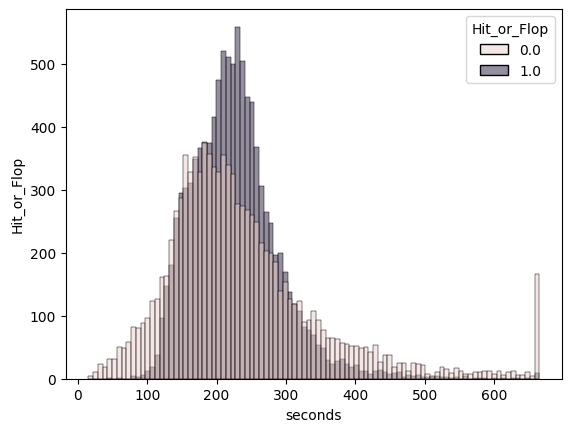

In [ ]:
spotify_df["seconds"] = spotify_df["duration_treated"]/1000
plt.subplot(1,1,1)
sns.histplot(data=spotify_df, x='seconds', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'seconds')
plt.ylabel(ylabel = 'Hit_or_Flop')

In [ ]:
spotify_df.duration_ms.sort_values(ascending=False)

7961     4170227
9169     3816373
31356    3791480
4104     3391040
254      2685093
          ...   
35251      20493
236        19533
25649      15920
39409      15629
11403      15168
Name: duration_ms, Length: 41106, dtype: int64

In [ ]:
# spotify_df[(spotify_df['danceability_tuned'] == 1) & 
#            (spotify_df['energy_tuned'] == 1) &
#            (spotify_df['loudness_tuned'] == 1) &
#            (spotify_df['acousticness_tuned'] == 1) &
#            (spotify_df['valence_tuned'] == 1)].count() - 20553

spotify_df.famous_artist_binary.sum()

7656

In [ ]:
(spotify_df.duration_ms/1000).describe()

count    41106.000000
mean       234.877550
std        118.967398
min         15.168000
25%        172.927750
50%        217.907000
75%        266.773000
max       4170.227000
Name: duration_ms, dtype: float64

<h2>VISUALIZE DATA WITH BOX PLOTS</h2>

In [ ]:
spotify_df.tuned_combine

0        1
1        0
2        1
3        1
4        1
        ..
41101    0
41102    0
41103    0
41104    1
41105    1
Name: tuned_combine, Length: 41106, dtype: int64

C:\Users\hboyz\AppData\Local\Temp\ipykernel_23916\2658413748.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,1)
C:\Users\hboyz\AppData\Local\Temp\ipykernel_23916\2658413748.py:43: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,1)
C:\Users\hboyz\AppData\Local\Temp\ipykernel_23916\2658413748.py:74: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,1)


Text(0, 0.5, 'Frequency')

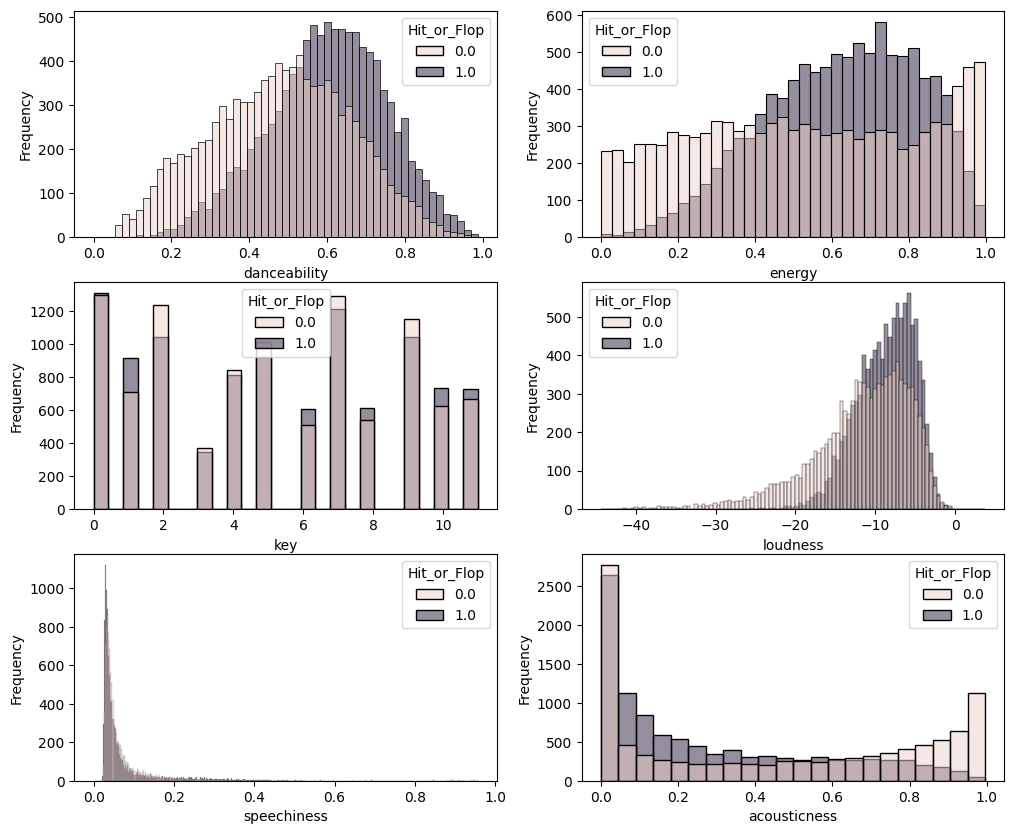

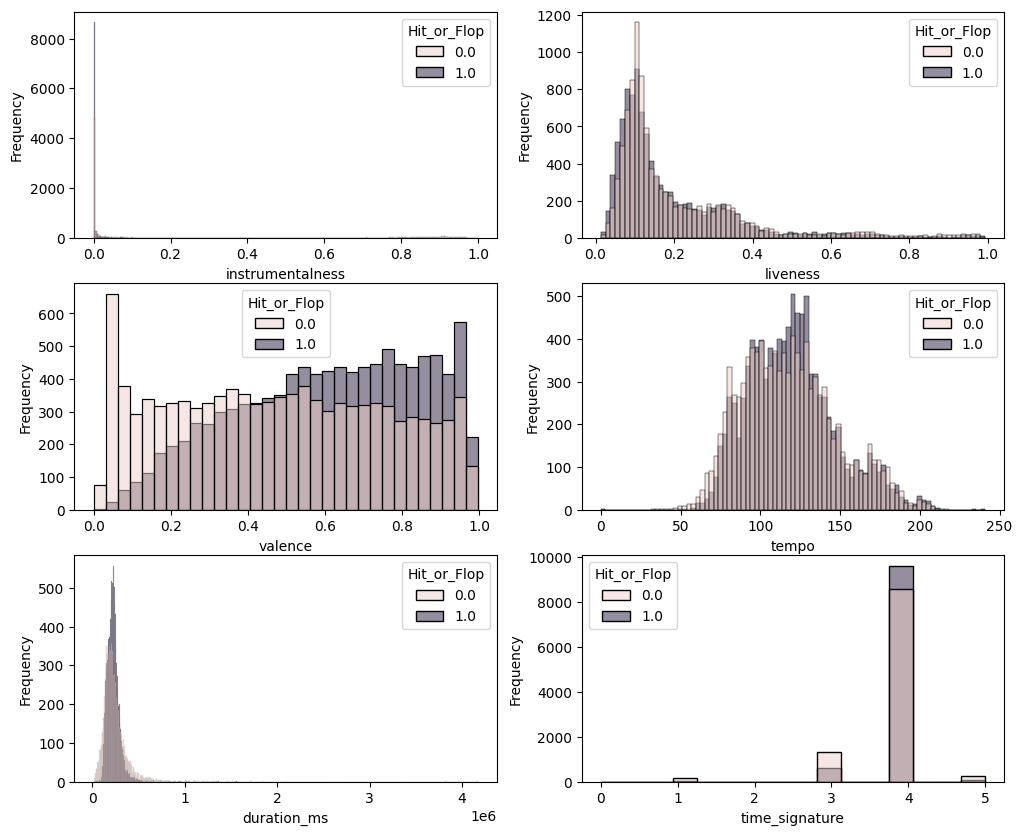

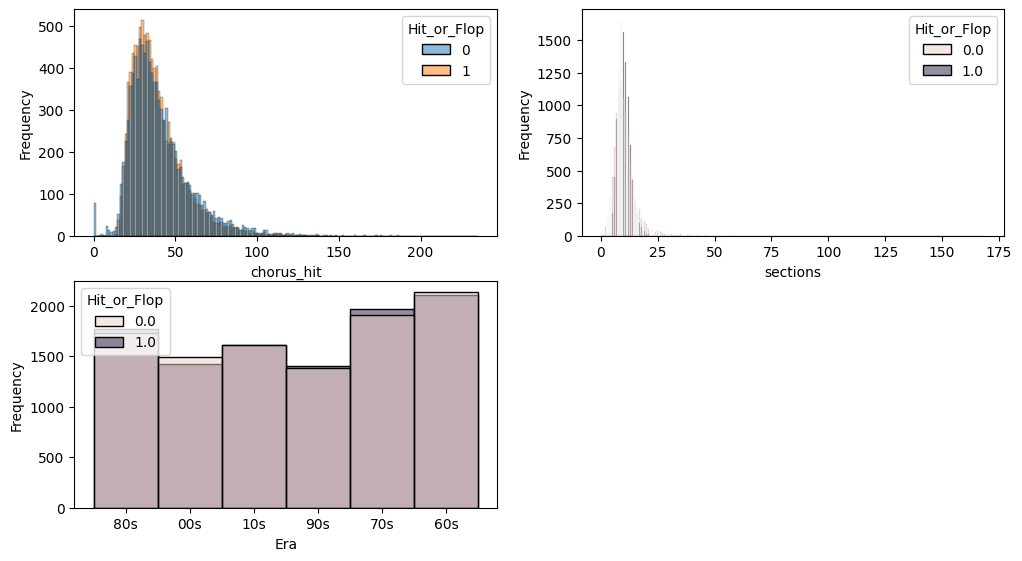

In [ ]:
########################
# Visual EDA (Scatterplots and boxplots)
########################

# prepare a dataframe for cryosleep and transported heatmap
# Cryosleep_Transported_Map = spotify_df[["CryoSleep", "Transported_New"]]
# Cryosleep_Transported_Map["CryoSleep"] = np.where(Cryosleep_Transported_Map["CryoSleep"] == False, 0, 1)
# Cryosleep_Transported_Map

fig, axes = plt.subplots(figsize = (12, 10))
plt.subplot(3,2,1)
sns.histplot(data=spotify_df, x='danceability', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'danceability')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,2)
sns.histplot(data=spotify_df, x='energy', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'energy')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,3)
sns.histplot(data=spotify_df, x='key', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'key')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,4)
sns.histplot(data=spotify_df, x='loudness', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'loudness')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,5)
sns.histplot(data=spotify_df, x='speechiness', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'speechiness')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,6)
sns.histplot(data=spotify_df, x='acousticness', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'acousticness')
plt.ylabel(ylabel = 'Frequency')


fig, axes = plt.subplots(figsize = (12, 10))
plt.subplot(3,2,1)
sns.histplot(data=spotify_df, x='instrumentalness', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'instrumentalness')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,2)
sns.histplot(data=spotify_df, x='liveness', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'liveness')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,3)
sns.histplot(data=spotify_df, x='valence', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'valence')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,4)
sns.histplot(data=spotify_df, x='tempo', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'tempo')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,5)
sns.histplot(data=spotify_df, x='duration_ms', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'duration_ms')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,6)
sns.histplot(data=spotify_df, x='time_signature', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'time_signature')
plt.ylabel(ylabel = 'Frequency')

fig, axes = plt.subplots(figsize = (12, 10))
plt.subplot(3,2,1)
sns.histplot(data=spotify_train, x='chorus_hit', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'chorus_hit')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,2)
sns.histplot(data=spotify_df, x='sections', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'sections')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,3)
sns.histplot(data=spotify_df, x='Era', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'Era')
plt.ylabel(ylabel = 'Frequency')

# plt.show()
# plt.subplot(3,2,4)
# iris = Cryosleep_Transported_Map
# # species = iris.pop("species")
# # sns.clustermap(iris)
# # sns.histplot(data=spotify_df, x='MemberId', hue='Transported_New', multiple="stack")
# plt.xlabel(xlabel = 'CABIN HEADCOUNT')
# plt.ylabel(ylabel = 'NUMBER OF TRANSPORTED')

# plt.subplot(3,2,5)
# sns.histplot(data=spotify_df, x='Total_Lux_Spending', hue='Transported_New', multiple="stack")
# plt.xlabel(xlabel = 'TOTAL LUX SPENDING')
# plt.ylabel(ylabel = 'NUMBER OF TRANSPORTED')

# plt.subplot(3,2,6)
# sns.heatmap(Cryosleep_Transported_Map, annot=True)
# plt.xlabel(xlabel = 'CRYOSLEEP')
# plt.ylabel(ylabel = 'NUMBER OF TRANSPORTED')


# plt.subplot(3,2,6)
# sns.histplot(data=spotify_df, x='VIP', hue='Transported_New', multiple="stack")
# plt.xlabel(xlabel = 'CRYOSLEEP')
# plt.ylabel(ylabel = 'NUMBER OF TRANSPORTED')

# # setting figure size for all continuous data
# fig, axes = plt.subplots(figsize = (12, 10))

# # developing a scatterplot for Avg. time per site visit
# # and revenue with color dark yellow
# plt.subplot(1, 1, 1)
# sns.boxplot(x = spotify_df['Age'],
#                 y = spotify_df['Transported_New'],
#                 color = 'r')
# # adding labels but not adding title
# plt.xlabel(xlabel = 'AGE')
# plt.ylabel(ylabel = 'NUMBER OF TRANSPORTED')

# ########################

# # developing a scatterplot for Avg. prep. video time
# # and revenue with color orange
# plt.subplot(3, 2, 2)
# sns.scatterplot(x = spotify_df['AVG_PREP_VID_TIME'],
#                 y = spotify_df['REVENUE'],
#                 color = 'orange')
# # adding labels but not adding title
# plt.xlabel(xlabel = 'Avg. preview video time')
# plt.ylabel(ylabel = 'Revenue')

# ########################

# # developing a scatterplot for total meals ordered
# # and revenue with color red
# plt.subplot(3, 2, 3)
# sns.scatterplot(x = spotify_df['TOTAL_MEALS_ORDERED'],
#                 y = spotify_df['REVENUE'],
#                 color = 'red')
# # adding labels but not adding title
# plt.xlabel(xlabel = 'Total meals ordered')
# plt.ylabel(ylabel = 'Revenue')

# ########################

# # developing a scatterplot for total photos viewed
# # and revenue with color blue
# plt.subplot(3, 2, 4)
# sns.scatterplot(x = spotify_df['TOTAL_PHOTOS_VIEWED'],
#                 y = spotify_df['REVENUE'],
#                 color = 'blue')
# # adding labels but not adding title
# plt.xlabel(xlabel = 'Total photo viewed')
# plt.ylabel(ylabel = 'Revenue')

# ########################

# # developing a scatterplot for meal ordered multiply x largest size
# # and revenue with color green
# plt.subplot(3, 2, 5)
# sns.scatterplot(x = spotify_df['MEAL_ORDERED_MULTIPLY_LARGEST_SIZE'],
#                 y = spotify_df['REVENUE'],
#                 color = 'green')
# # adding labels but not adding title
# plt.xlabel(xlabel = 'Meal Orders to Largest Size')
# plt.ylabel(ylabel = 'Revenue')

Text(0, 0.5, 'Hit_or_Flop')

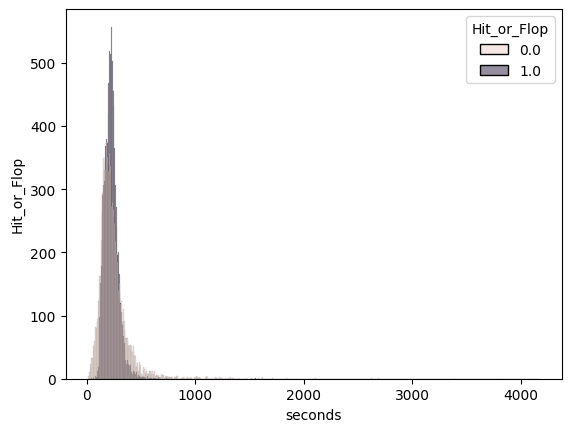

In [ ]:
spotify_df["seconds"] = spotify_df["duration_ms"]/1000
plt.subplot(1,1,1)
sns.histplot(data=spotify_df, x='seconds', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'seconds')
plt.ylabel(ylabel = 'Hit_or_Flop')

C:\Users\hboyz\AppData\Local\Temp\ipykernel_36464\1236941291.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,1)
C:\Users\hboyz\AppData\Local\Temp\ipykernel_36464\1236941291.py:41: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,1)
C:\Users\hboyz\AppData\Local\Temp\ipykernel_36464\1236941291.py:72: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,1)


Text(0, 0.5, 'Frequency')

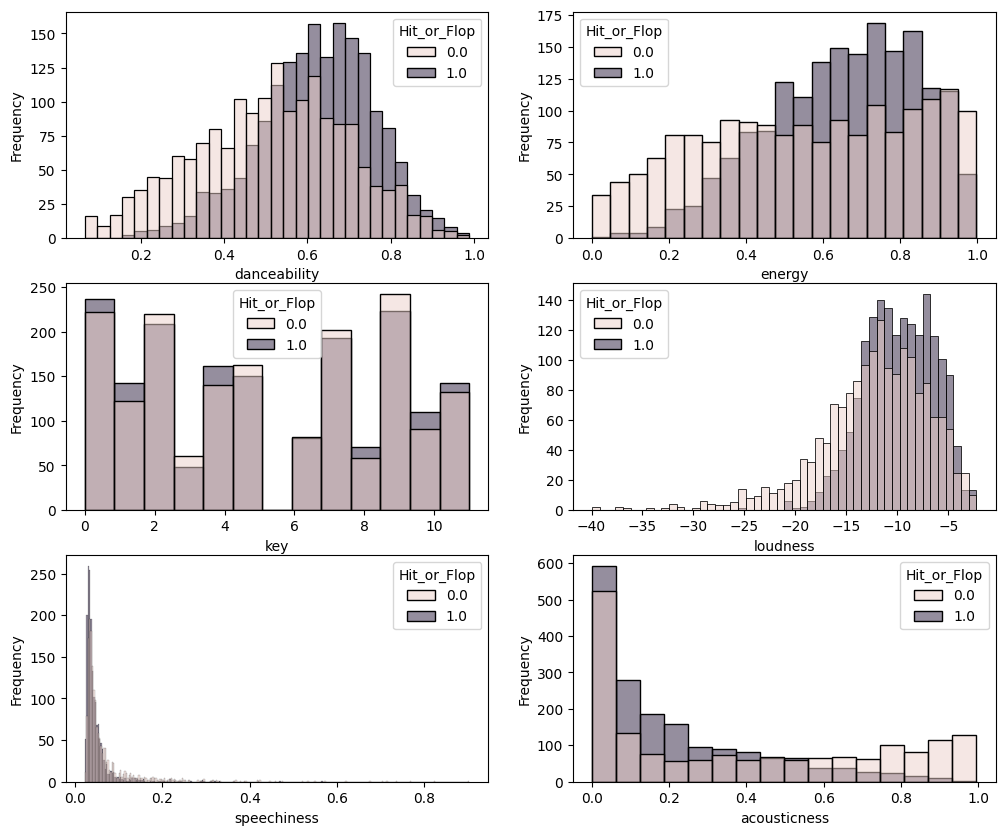

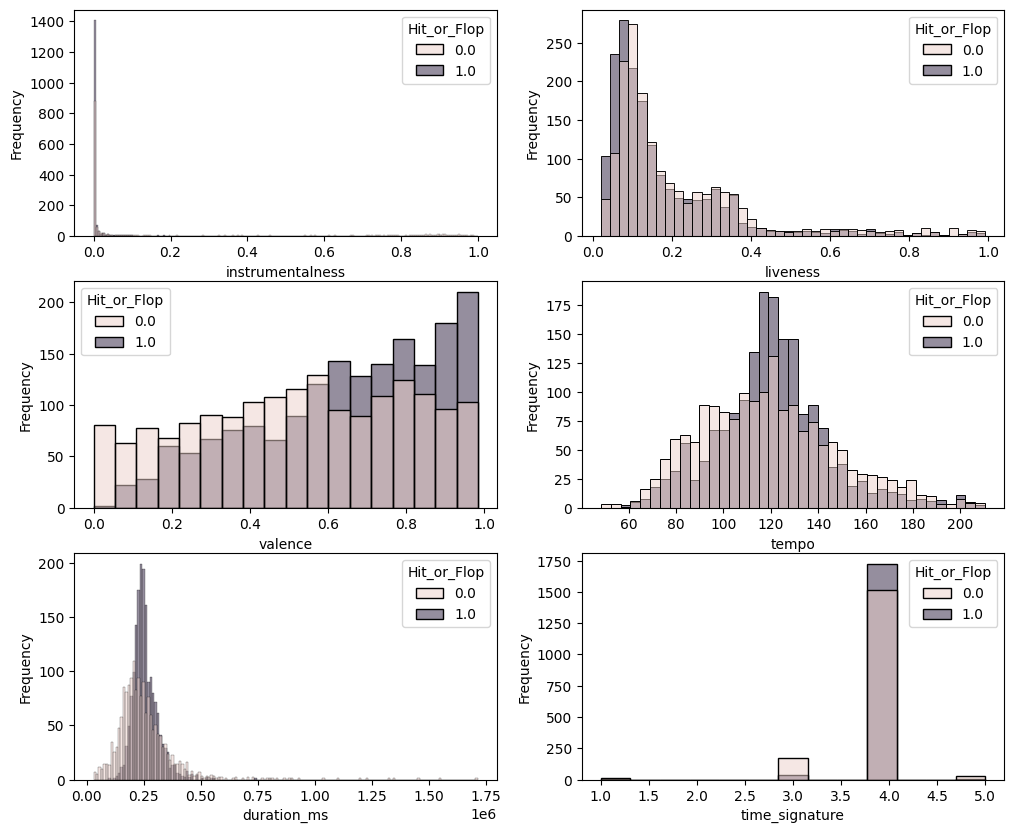

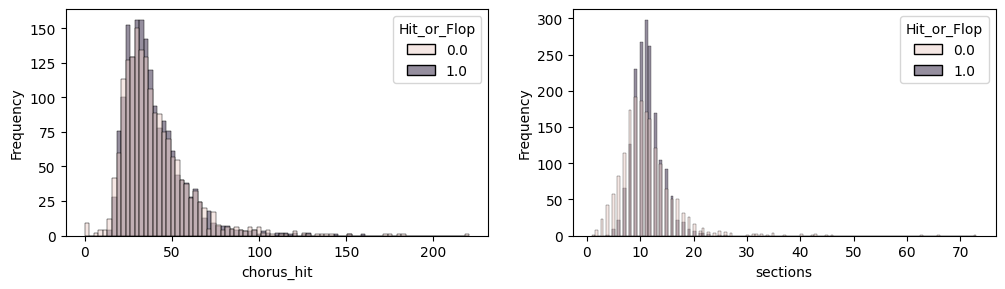

In [ ]:
########################
# Visual EDA (Scatterplots and boxplots)
########################

spotify_df_80 = spotify_df[spotify_df.Era == '80s'].copy()


fig, axes = plt.subplots(figsize = (12, 10))
plt.subplot(3,2,1)
sns.histplot(data=spotify_df_80, x='danceability', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'danceability')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,2)
sns.histplot(data=spotify_df_80, x='energy', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'energy')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,3)
sns.histplot(data=spotify_df_80, x='key', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'key')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,4)
sns.histplot(data=spotify_df_80, x='loudness', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'loudness')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,5)
sns.histplot(data=spotify_df_80, x='speechiness', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'speechiness')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,6)
sns.histplot(data=spotify_df_80, x='acousticness', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'acousticness')
plt.ylabel(ylabel = 'Frequency')


fig, axes = plt.subplots(figsize = (12, 10))
plt.subplot(3,2,1)
sns.histplot(data=spotify_df_80, x='instrumentalness', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'instrumentalness')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,2)
sns.histplot(data=spotify_df_80, x='liveness', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'liveness')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,3)
sns.histplot(data=spotify_df_80, x='valence', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'valence')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,4)
sns.histplot(data=spotify_df_80, x='tempo', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'tempo')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,5)
sns.histplot(data=spotify_df_80, x='duration_ms', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'duration_ms')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,6)
sns.histplot(data=spotify_df_80, x='time_signature', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'time_signature')
plt.ylabel(ylabel = 'Frequency')

fig, axes = plt.subplots(figsize = (12, 10))
plt.subplot(3,2,1)
sns.histplot(data=spotify_df_80, x='chorus_hit', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'chorus_hit')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,2)
sns.histplot(data=spotify_df_80, x='sections', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'sections')
plt.ylabel(ylabel = 'Frequency')

# plt.subplot(3,2,3)
# sns.histplot(data=spotify_df_80, x='Era', hue='Hit_or_Flop')
# plt.xlabel(xlabel = 'Era')
# plt.ylabel(ylabel = 'Frequency')


C:\Users\hboyz\AppData\Local\Temp\ipykernel_36464\2416503964.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,1)
C:\Users\hboyz\AppData\Local\Temp\ipykernel_36464\2416503964.py:37: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,1)
C:\Users\hboyz\AppData\Local\Temp\ipykernel_36464\2416503964.py:68: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,1)


Text(0, 0.5, 'Frequency')

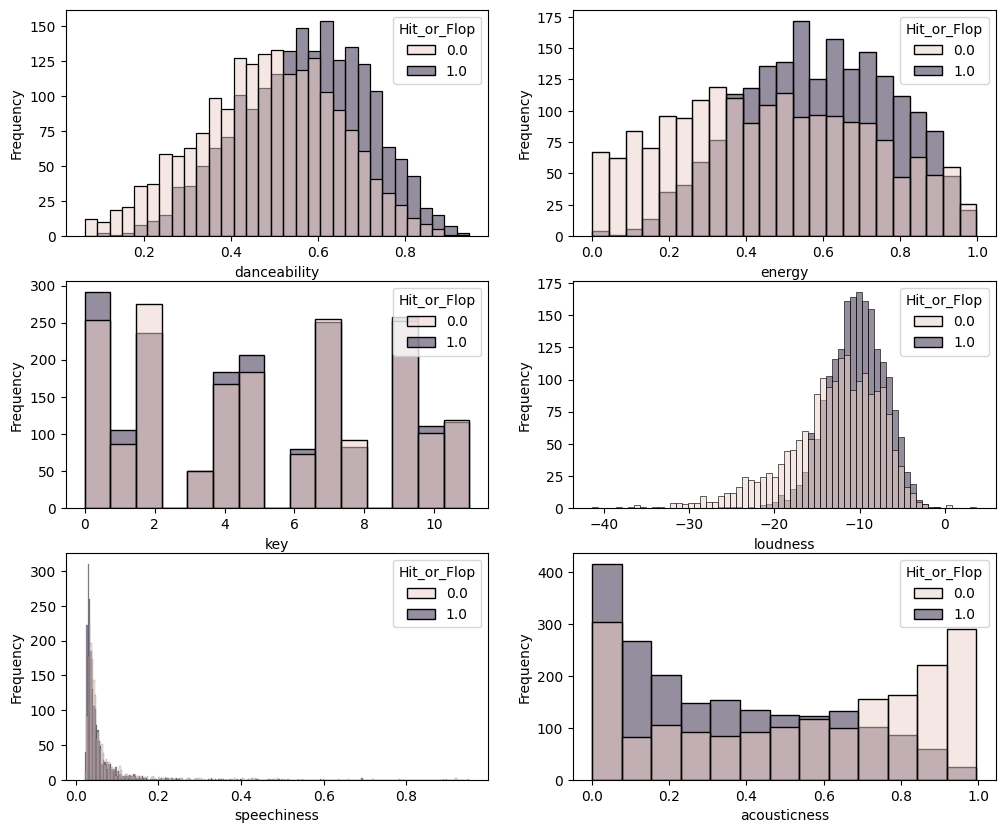

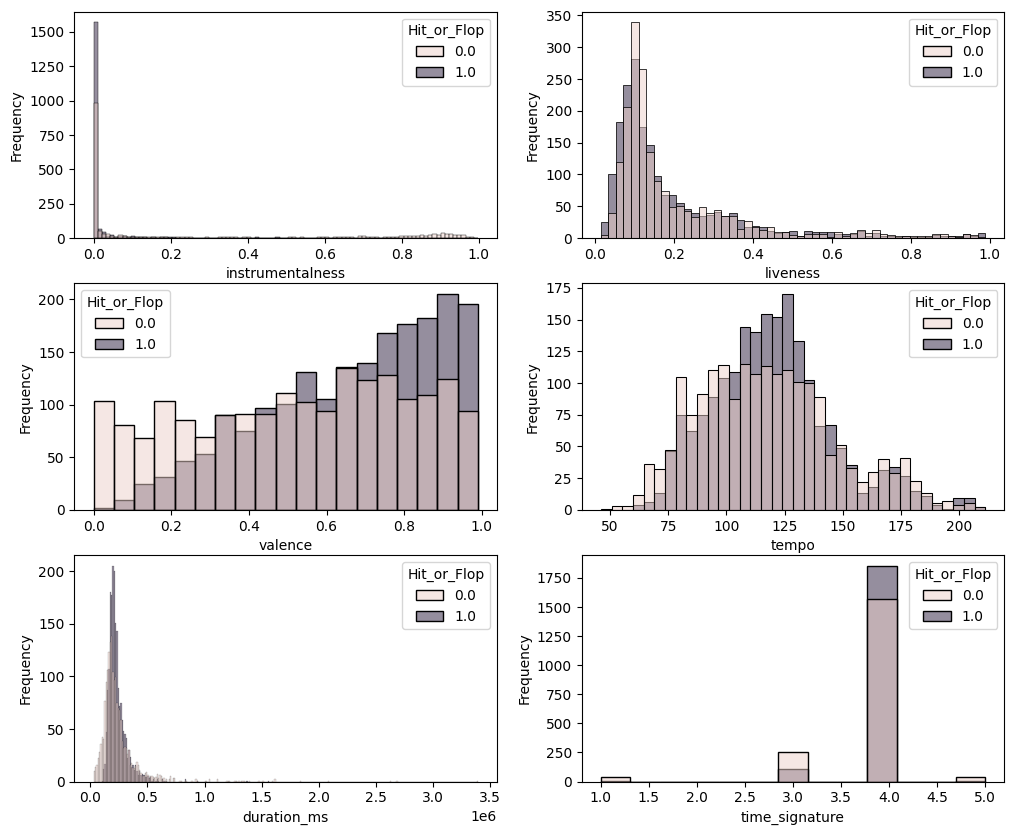

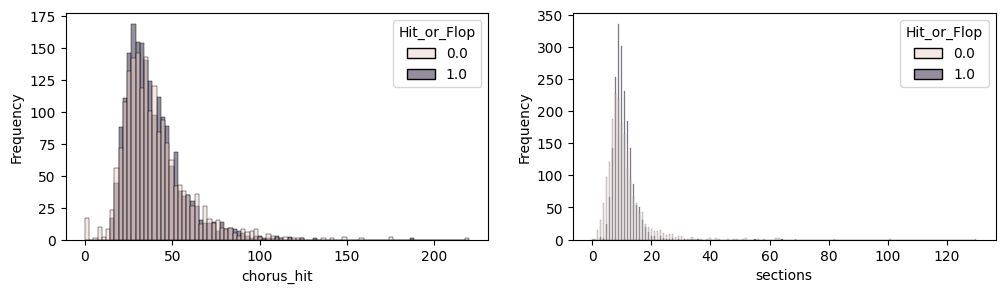

In [ ]:
spotify_df_70 = spotify_df[spotify_df.Era == '70s'].copy()


fig, axes = plt.subplots(figsize = (12, 10))
plt.subplot(3,2,1)
sns.histplot(data=spotify_df_70, x='danceability', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'danceability')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,2)
sns.histplot(data=spotify_df_70, x='energy', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'energy')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,3)
sns.histplot(data=spotify_df_70, x='key', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'key')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,4)
sns.histplot(data=spotify_df_70, x='loudness', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'loudness')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,5)
sns.histplot(data=spotify_df_70, x='speechiness', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'speechiness')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,6)
sns.histplot(data=spotify_df_70, x='acousticness', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'acousticness')
plt.ylabel(ylabel = 'Frequency')


fig, axes = plt.subplots(figsize = (12, 10))
plt.subplot(3,2,1)
sns.histplot(data=spotify_df_70, x='instrumentalness', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'instrumentalness')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,2)
sns.histplot(data=spotify_df_70, x='liveness', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'liveness')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,3)
sns.histplot(data=spotify_df_70, x='valence', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'valence')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,4)
sns.histplot(data=spotify_df_70, x='tempo', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'tempo')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,5)
sns.histplot(data=spotify_df_70, x='duration_ms', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'duration_ms')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,6)
sns.histplot(data=spotify_df_70, x='time_signature', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'time_signature')
plt.ylabel(ylabel = 'Frequency')

fig, axes = plt.subplots(figsize = (12, 10))
plt.subplot(3,2,1)
sns.histplot(data=spotify_df_70, x='chorus_hit', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'chorus_hit')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,2)
sns.histplot(data=spotify_df_70, x='sections', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'sections')
plt.ylabel(ylabel = 'Frequency')

# plt.subplot(3,2,3)
# sns.histplot(data=spotify_df_80, x='Era', hue='Hit_or_Flop')
# plt.xlabel(xlabel = 'Era')
# plt.ylabel(ylabel = 'Frequency')

Text(0, 0.5, 'Frequency')

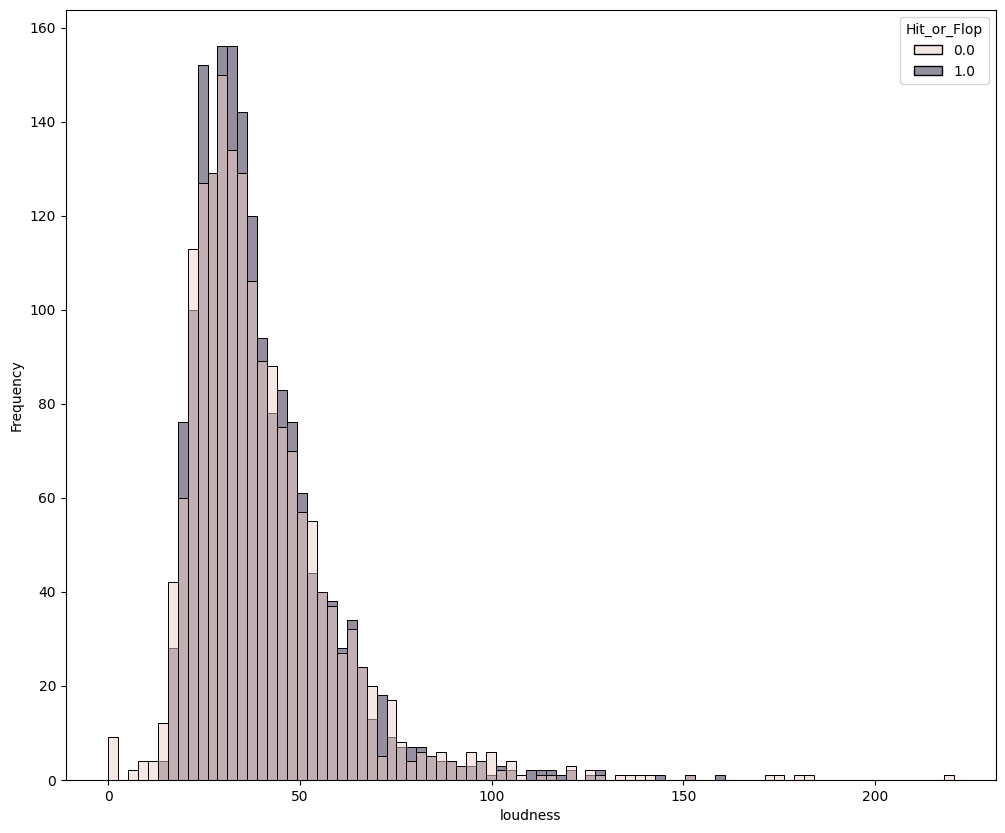

In [ ]:
spotify_df_70 = spotify_df[spotify_df.Era == '80s'].copy()
fig, axes = plt.subplots(figsize = (12, 10))

plt.subplot(1,1,1)
sns.histplot(data=spotify_df_70, x='chorus_hit', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'loudness')
plt.ylabel(ylabel = 'Frequency')

C:\Users\hboyz\AppData\Local\Temp\ipykernel_36464\2394687659.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,1)
C:\Users\hboyz\AppData\Local\Temp\ipykernel_36464\2394687659.py:37: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,1)
C:\Users\hboyz\AppData\Local\Temp\ipykernel_36464\2394687659.py:68: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,1)


Text(0, 0.5, 'Frequency')

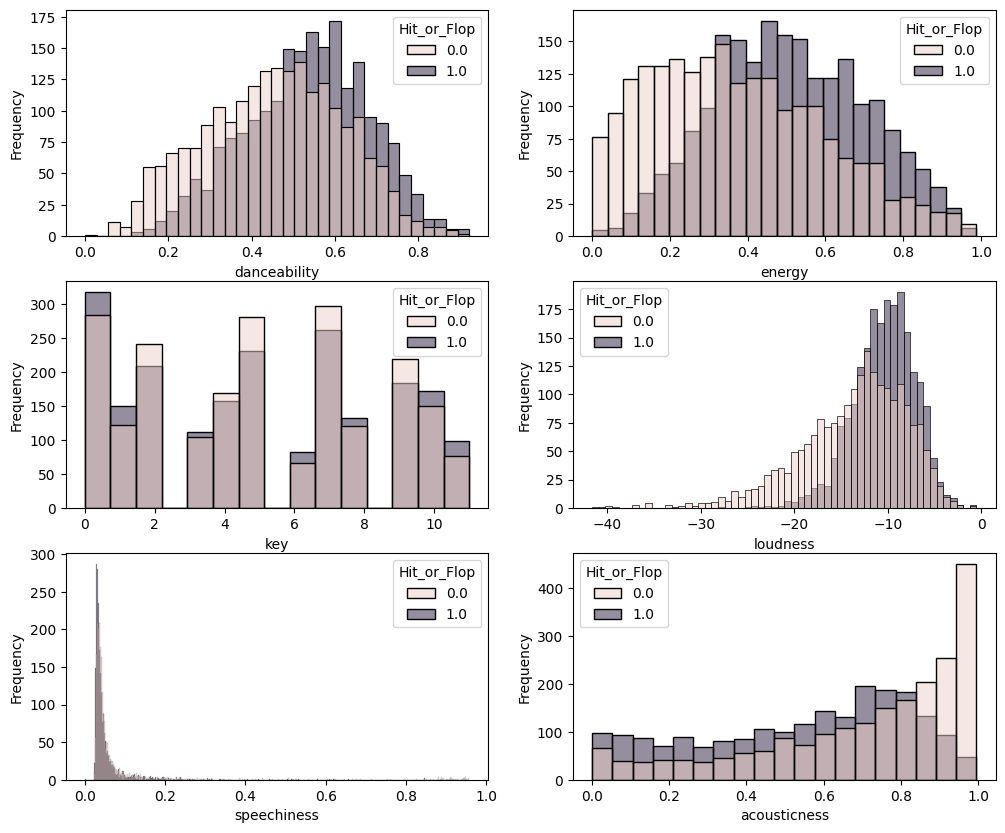

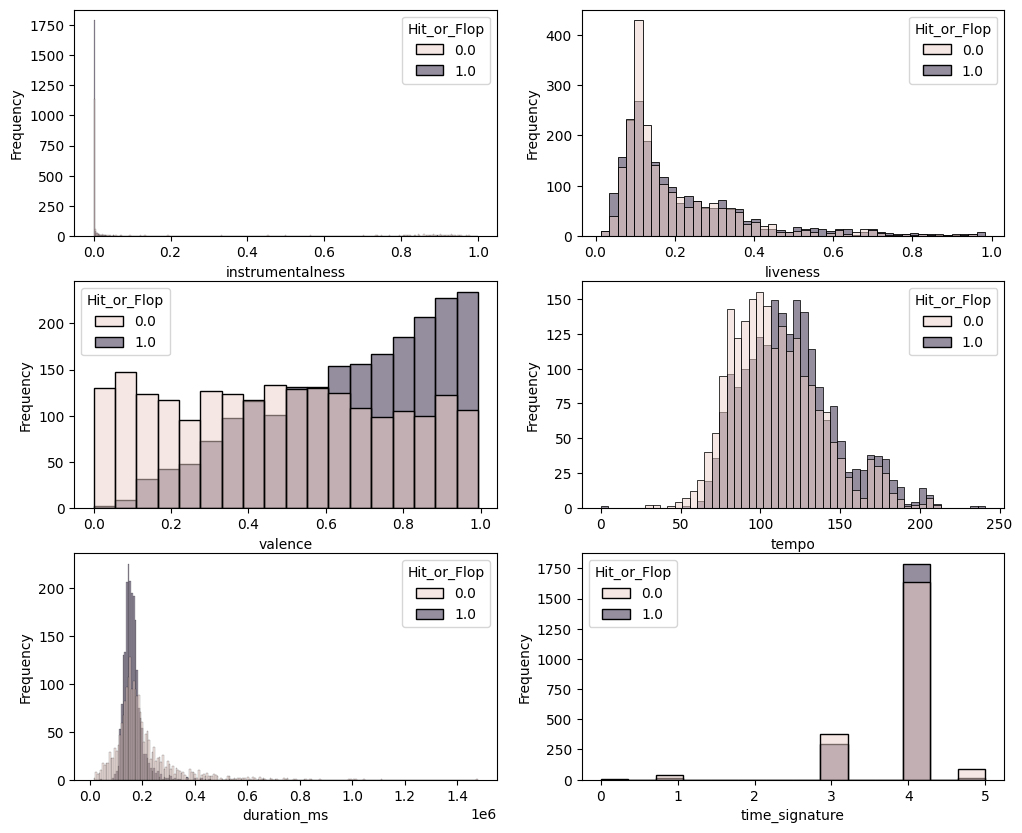

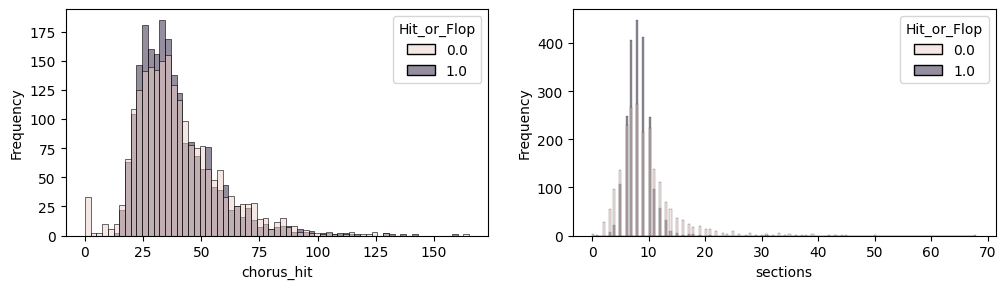

In [ ]:
spotify_df_60 = spotify_df[spotify_df.Era == '60s'].copy()


fig, axes = plt.subplots(figsize = (12, 10))
plt.subplot(3,2,1)
sns.histplot(data=spotify_df_60, x='danceability', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'danceability')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,2)
sns.histplot(data=spotify_df_60, x='energy', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'energy')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,3)
sns.histplot(data=spotify_df_60, x='key', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'key')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,4)
sns.histplot(data=spotify_df_60, x='loudness', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'loudness')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,5)
sns.histplot(data=spotify_df_60, x='speechiness', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'speechiness')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,6)
sns.histplot(data=spotify_df_60, x='acousticness', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'acousticness')
plt.ylabel(ylabel = 'Frequency')


fig, axes = plt.subplots(figsize = (12, 10))
plt.subplot(3,2,1)
sns.histplot(data=spotify_df_60, x='instrumentalness', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'instrumentalness')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,2)
sns.histplot(data=spotify_df_60, x='liveness', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'liveness')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,3)
sns.histplot(data=spotify_df_60, x='valence', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'valence')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,4)
sns.histplot(data=spotify_df_60, x='tempo', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'tempo')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,5)
sns.histplot(data=spotify_df_60, x='duration_ms', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'duration_ms')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,6)
sns.histplot(data=spotify_df_60, x='time_signature', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'time_signature')
plt.ylabel(ylabel = 'Frequency')

fig, axes = plt.subplots(figsize = (12, 10))
plt.subplot(3,2,1)
sns.histplot(data=spotify_df_60, x='chorus_hit', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'chorus_hit')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,2)
sns.histplot(data=spotify_df_60, x='sections', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'sections')
plt.ylabel(ylabel = 'Frequency')

# plt.subplot(3,2,3)
# sns.histplot(data=spotify_df_80, x='Era', hue='Hit_or_Flop')
# plt.xlabel(xlabel = 'Era')
# plt.ylabel(ylabel = 'Frequency')

C:\Users\hboyz\AppData\Local\Temp\ipykernel_36464\2367988925.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,1)
C:\Users\hboyz\AppData\Local\Temp\ipykernel_36464\2367988925.py:37: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,1)
C:\Users\hboyz\AppData\Local\Temp\ipykernel_36464\2367988925.py:68: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,1)


Text(0, 0.5, 'Frequency')

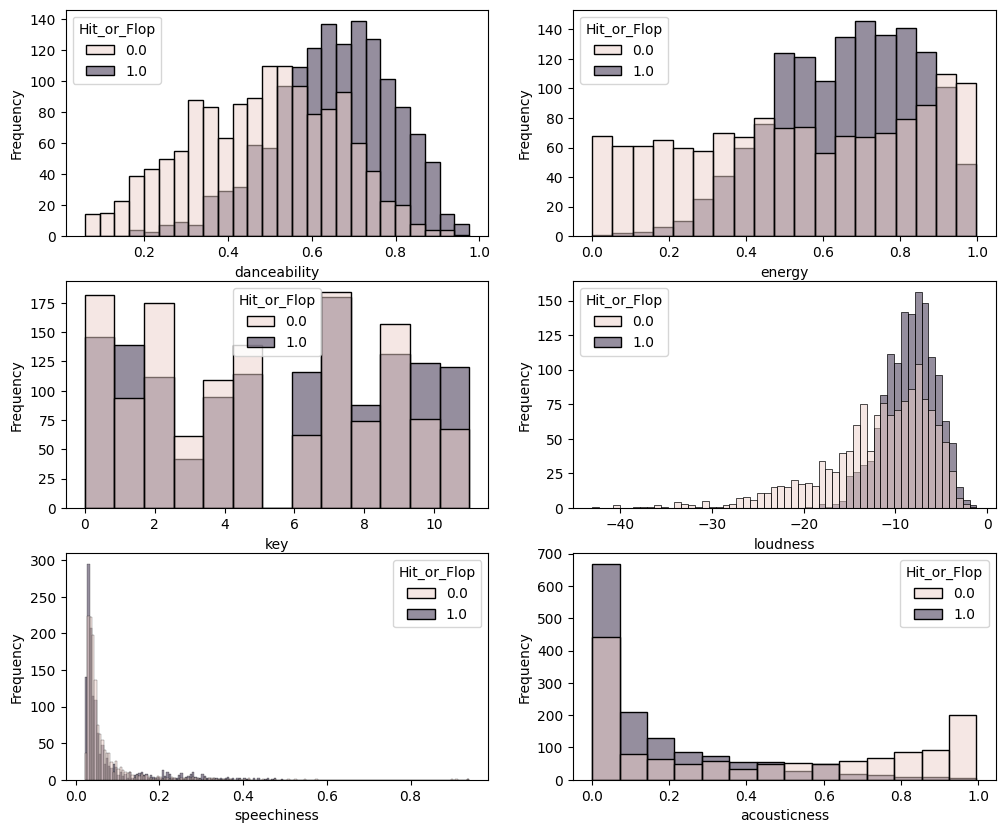

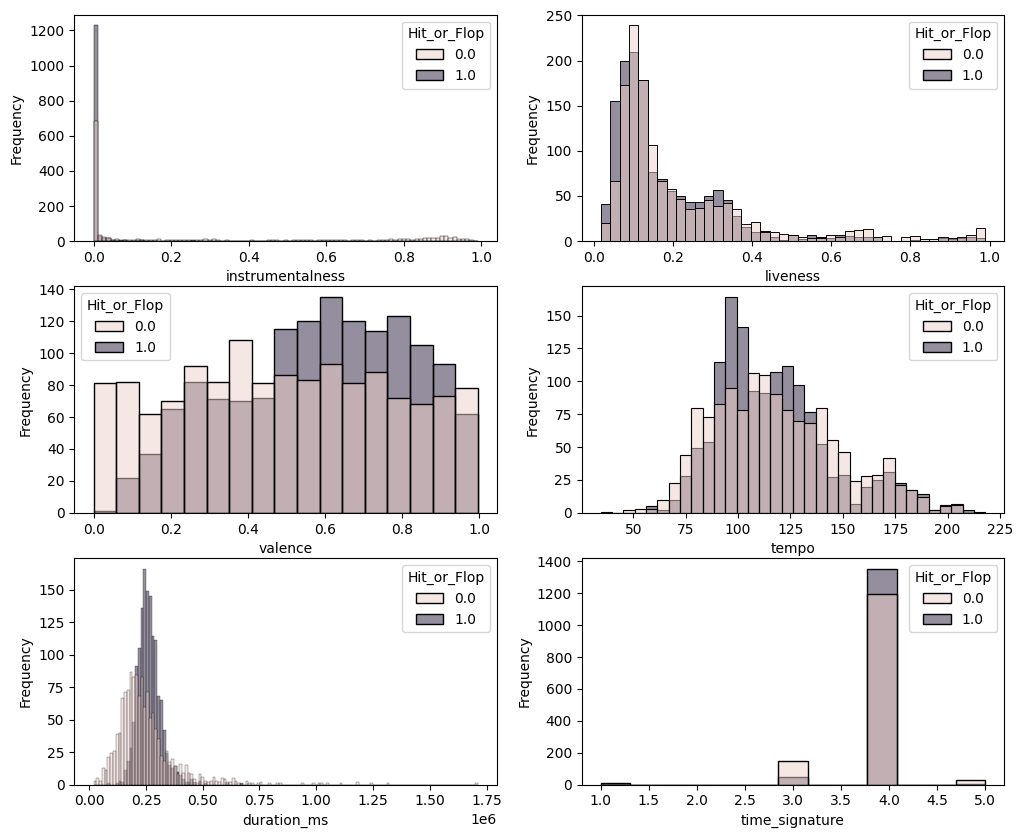

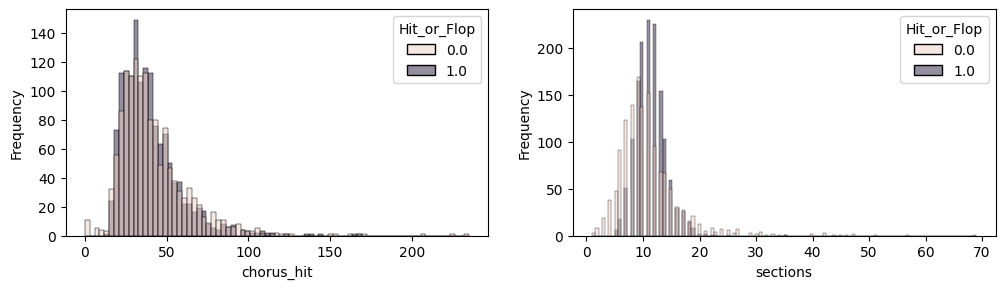

In [ ]:
spotify_df_90 = spotify_df[spotify_df.Era == '90s'].copy()


fig, axes = plt.subplots(figsize = (12, 10))
plt.subplot(3,2,1)
sns.histplot(data=spotify_df_90, x='danceability', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'danceability')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,2)
sns.histplot(data=spotify_df_90, x='energy', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'energy')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,3)
sns.histplot(data=spotify_df_90, x='key', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'key')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,4)
sns.histplot(data=spotify_df_90, x='loudness', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'loudness')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,5)
sns.histplot(data=spotify_df_90, x='speechiness', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'speechiness')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,6)
sns.histplot(data=spotify_df_90, x='acousticness', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'acousticness')
plt.ylabel(ylabel = 'Frequency')


fig, axes = plt.subplots(figsize = (12, 10))
plt.subplot(3,2,1)
sns.histplot(data=spotify_df_90, x='instrumentalness', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'instrumentalness')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,2)
sns.histplot(data=spotify_df_90, x='liveness', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'liveness')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,3)
sns.histplot(data=spotify_df_90, x='valence', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'valence')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,4)
sns.histplot(data=spotify_df_90, x='tempo', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'tempo')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,5)
sns.histplot(data=spotify_df_90, x='duration_ms', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'duration_ms')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,6)
sns.histplot(data=spotify_df_90, x='time_signature', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'time_signature')
plt.ylabel(ylabel = 'Frequency')

fig, axes = plt.subplots(figsize = (12, 10))
plt.subplot(3,2,1)
sns.histplot(data=spotify_df_90, x='chorus_hit', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'chorus_hit')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,2)
sns.histplot(data=spotify_df_90, x='sections', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'sections')
plt.ylabel(ylabel = 'Frequency')

# plt.subplot(3,2,3)
# sns.histplot(data=spotify_df_80, x='Era', hue='Hit_or_Flop')
# plt.xlabel(xlabel = 'Era')
# plt.ylabel(ylabel = 'Frequency')

C:\Users\hboyz\AppData\Local\Temp\ipykernel_36464\2381180464.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,1)
C:\Users\hboyz\AppData\Local\Temp\ipykernel_36464\2381180464.py:37: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,1)
C:\Users\hboyz\AppData\Local\Temp\ipykernel_36464\2381180464.py:68: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,1)


Text(0, 0.5, 'Frequency')

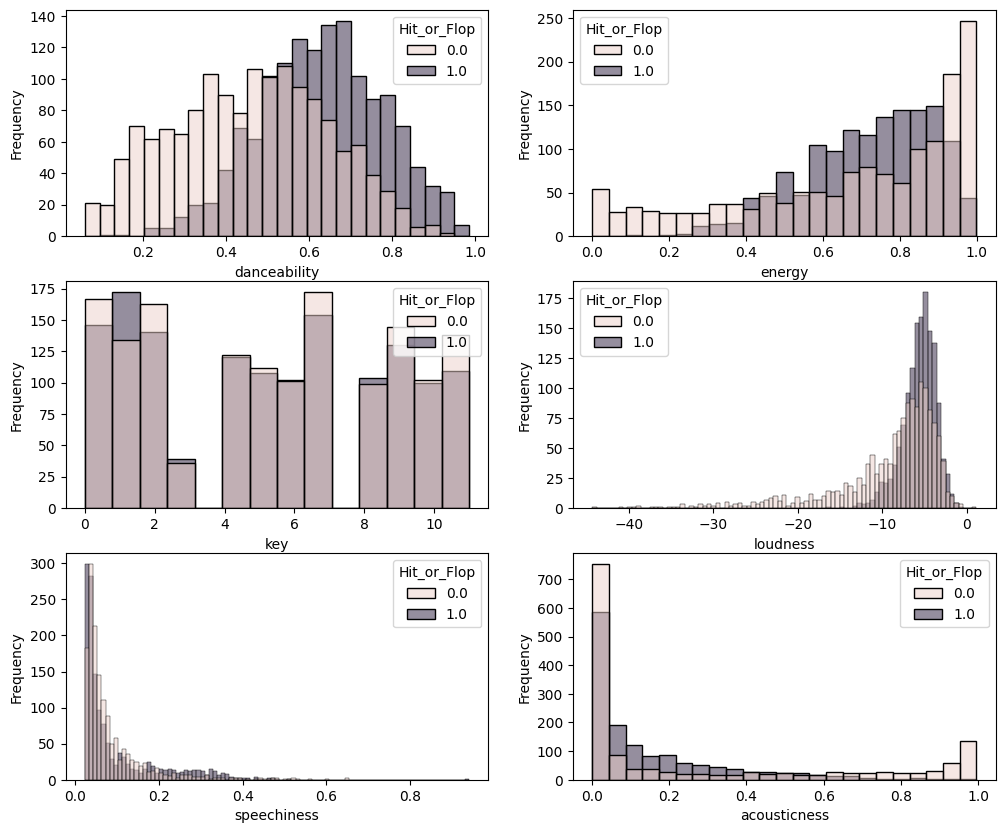

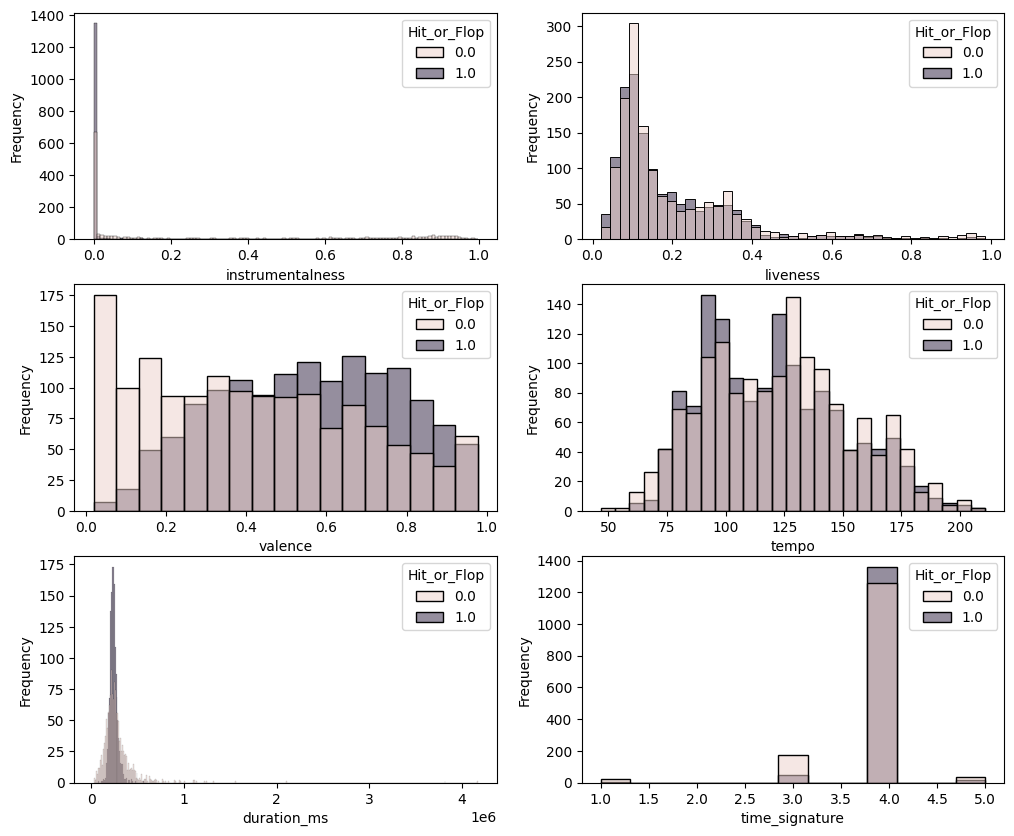

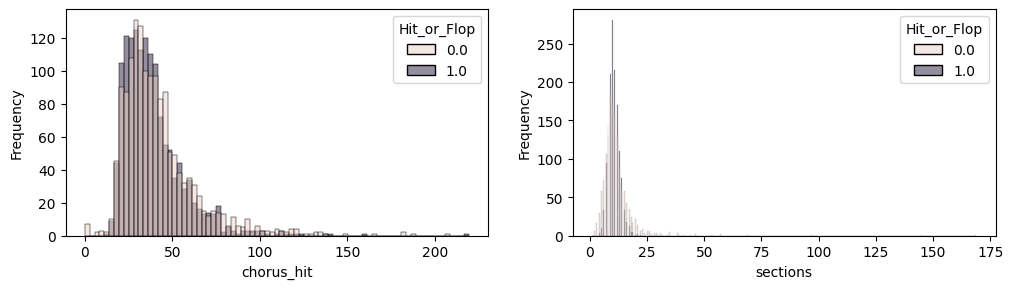

In [ ]:
spotify_df_00 = spotify_df[spotify_df.Era == '00s'].copy()


fig, axes = plt.subplots(figsize = (12, 10))
plt.subplot(3,2,1)
sns.histplot(data=spotify_df_00, x='danceability', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'danceability')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,2)
sns.histplot(data=spotify_df_00, x='energy', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'energy')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,3)
sns.histplot(data=spotify_df_00, x='key', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'key')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,4)
sns.histplot(data=spotify_df_00, x='loudness', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'loudness')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,5)
sns.histplot(data=spotify_df_00, x='speechiness', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'speechiness')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,6)
sns.histplot(data=spotify_df_00, x='acousticness', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'acousticness')
plt.ylabel(ylabel = 'Frequency')


fig, axes = plt.subplots(figsize = (12, 10))
plt.subplot(3,2,1)
sns.histplot(data=spotify_df_00, x='instrumentalness', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'instrumentalness')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,2)
sns.histplot(data=spotify_df_00, x='liveness', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'liveness')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,3)
sns.histplot(data=spotify_df_00, x='valence', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'valence')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,4)
sns.histplot(data=spotify_df_00, x='tempo', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'tempo')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,5)
sns.histplot(data=spotify_df_00, x='duration_ms', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'duration_ms')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,6)
sns.histplot(data=spotify_df_00, x='time_signature', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'time_signature')
plt.ylabel(ylabel = 'Frequency')

fig, axes = plt.subplots(figsize = (12, 10))
plt.subplot(3,2,1)
sns.histplot(data=spotify_df_00, x='chorus_hit', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'chorus_hit')
plt.ylabel(ylabel = 'Frequency')

plt.subplot(3,2,2)
sns.histplot(data=spotify_df_00, x='sections', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'sections')
plt.ylabel(ylabel = 'Frequency')

# plt.subplot(3,2,3)
# sns.histplot(data=spotify_df_80, x='Era', hue='Hit_or_Flop')
# plt.xlabel(xlabel = 'Era')
# plt.ylabel(ylabel = 'Frequency')

<h2>CLASSIFICATION MODELING</h2>

In [ ]:
#dropping some columns which are not important
spotify_df_new = spotify_df.copy()
spotify_df_new.drop(columns=['track',
                      'artist',
                      'uri',
                      'Era'], axis=1, inplace=True)

In [ ]:
# instantiating a correlation matrix
spotify_corr = spotify_df[ spotify_df['set']   == 'Training' ].corr(method = 'pearson').round(decimals = 2)

# transforming correlations to absolute values
spotify_corr.loc[ : , 'Hit_or_Flop' ].apply(func = abs).sort_values(ascending = False)

C:\Users\hboyz\AppData\Local\Temp\ipykernel_39284\3416315978.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spotify_corr = spotify_df[ spotify_df['set']   == 'Training' ].corr(method = 'pearson').round(decimals = 2)


Hit_or_Flop                   1.00
famous_artist_binary          0.99
instrumentalness              0.40
danceability                  0.35
tuned_combine                 0.35
acousticness_tuned            0.29
loudness                      0.29
loudness_tuned                0.28
energy_tuned                  0.27
acousticness                  0.25
valence                       0.25
danceability_tuned            0.24
valence_tuned                 0.24
top_word_manual               0.22
energy                        0.19
duration_treated_with_zero    0.18
word_count_love               0.15
track_word_count              0.12
time_signature                0.10
mode                          0.08
loud_by_90s                   0.07
dance_by_10s                  0.07
energy_by_10s                 0.07
energy_by_70s                 0.07
top_artists_100               0.07
duration_ms                   0.07
duration_treated              0.06
sections                      0.06
acoustic_by_90s     

In [ ]:
# NON-LOG

# instantiating a logistic regression model object
logistic_full = smf.logit(formula   = """Hit_or_Flop ~ 
                        instrumentalness + 
                        danceability+
                        loudness+
                        acousticness+ 
                        tuned_combine+  
                        track_word_count+
                        top_word_manual+
                        tempo+
                        mode+
                        id+
                        speechiness+            
                        valence+      
                        duration_treated_with_zero+
                        liveness+
                        sections+
                        chorus_hit+
                        Era_num+ 
                        energy_tuned+   
                        famous_artist_binary+
                        artist_code+
                        time_signature+
                        key+
                        top_artists_100
                        """,
                           data = spotify_df)

# FITTING the model object
results_logistic = logistic_full.fit()

# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC summary2 is abit better

#top_word_manual +

Optimization terminated successfully.
         Current function value: 0.503621
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
===========================================================================
Model:                  Logit               Pseudo R-squared:    0.273     
Dependent Variable:     Hit_or_Flop         AIC:                 20745.8481
Date:                   2023-04-21 16:24    BIC:                 20920.3249
No. Observations:       20553               Log-Likelihood:      -10351.   
Df Model:               21                  LL-Null:             -14246.   
Df Residuals:           20531               LLR p-value:         0.0000    
Converged:              1.0000              Scale:               1.0000    
No. Iterations:         7.0000                                             
---------------------------------------------------------------------------
                            Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
Intercept                  -0.3831   0.2555  -1.4992 0.1338 -0.8839  0.1177
instrumentalness           -3.5095   0.0985 -35.6359 0.0000 -3.7026 -3.3165
danceability                4.0030   0.1413  28.3275 0.0000  3.7261  4.2800
loudness                    0.0645   0.0058  11.0793 0.0000  0.0531  0.0759
acousticness               -0.8810   0.0735 -11.9920 0.0000 -1.0250 -0.7370
tuned_combine               0.3995   0.0525   7.6089 0.0000  0.2966  0.5025
track_word_count           -0.0625   0.0082  -7.6100 0.0000 -0.0786 -0.0464
tempo                       0.0027   0.0006   4.3979 0.0000  0.0015  0.0040
mode                        0.4512   0.0381  11.8540 0.0000  0.3766  0.5257
id                         -0.0001   0.0000 -24.6691 0.0000 -0.0001 -0.0000
speechiness                -2.7507   0.2203 -12.4850 0.0000 -3.1826 -2.3189
valence                    -0.9554   0.0949 -10.0629 0.0000 -1.1415 -0.7693
duration_treated_with_zero  0.0000   0.0000  14.5346 0.0000  0.0000  0.0000
liveness                   -0.4414   0.1010  -4.3680 0.0000 -0.6394 -0.2433
sections                   -0.0236   0.0054  -4.3719 0.0000 -0.0342 -0.0130
chorus_hit                 -0.0038   0.0010  -3.9275 0.0001 -0.0056 -0.0019
Era_num                    -0.0576   0.0118  -4.8670 0.0000 -0.0808 -0.0344
energy_tuned                0.1542   0.0744   2.0740 0.0381  0.0085  0.3000
artist_code                -0.0000   0.0000  -1.2085 0.2269 -0.0000  0.0000
time_signature              0.1325   0.0476   2.7843 0.0054  0.0392  0.2257
key                         0.0085   0.0049   1.7580 0.0787 -0.0010  0.0181
top_artists_100            -1.1548   0.0544 -21.2094 0.0000 -1.2615 -1.0481
===========================================================================

"""

0        False
1        False
2        False
3        False
4        False
         ...  
41101    False
41102    False
41103    False
41104    False
41105    False
Name: artist_code, Length: 41106, dtype: bool

Text(0, 0.5, 'Frequency')

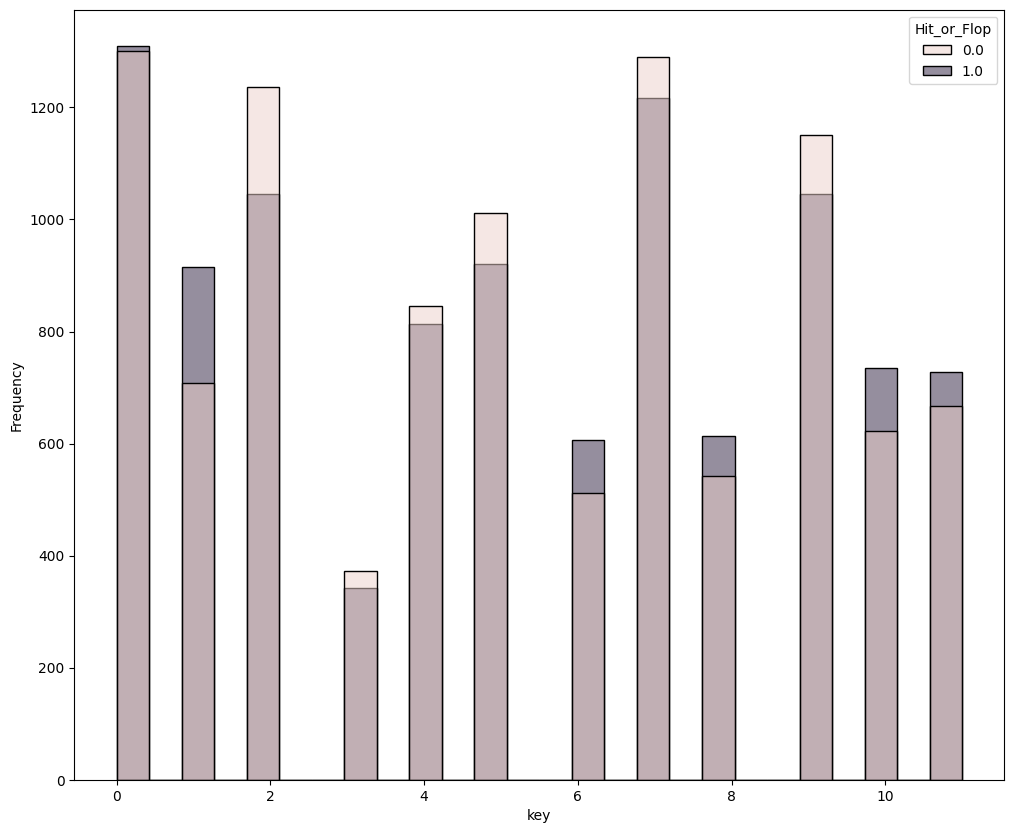

In [ ]:
fig, axes = plt.subplots(figsize = (12, 10))
plt.subplot(1,1,1)
sns.histplot(data=spotify_df, x='key', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'key')
plt.ylabel(ylabel = 'Frequency')

In [ ]:
spotify_train[spotify_train["chorus_hit"]== 60.94077].count()

track               7
artist              7
uri                 7
danceability        7
energy              7
key                 7
loudness            7
mode                7
speechiness         7
acousticness        7
instrumentalness    7
liveness            7
valence             7
tempo               7
duration_ms         7
time_signature      7
chorus_hit          7
sections            7
Hit_or_Flop         7
Era                 7
id                  7
set                 7
dtype: int64

Text(0, 0.5, 'Frequency')

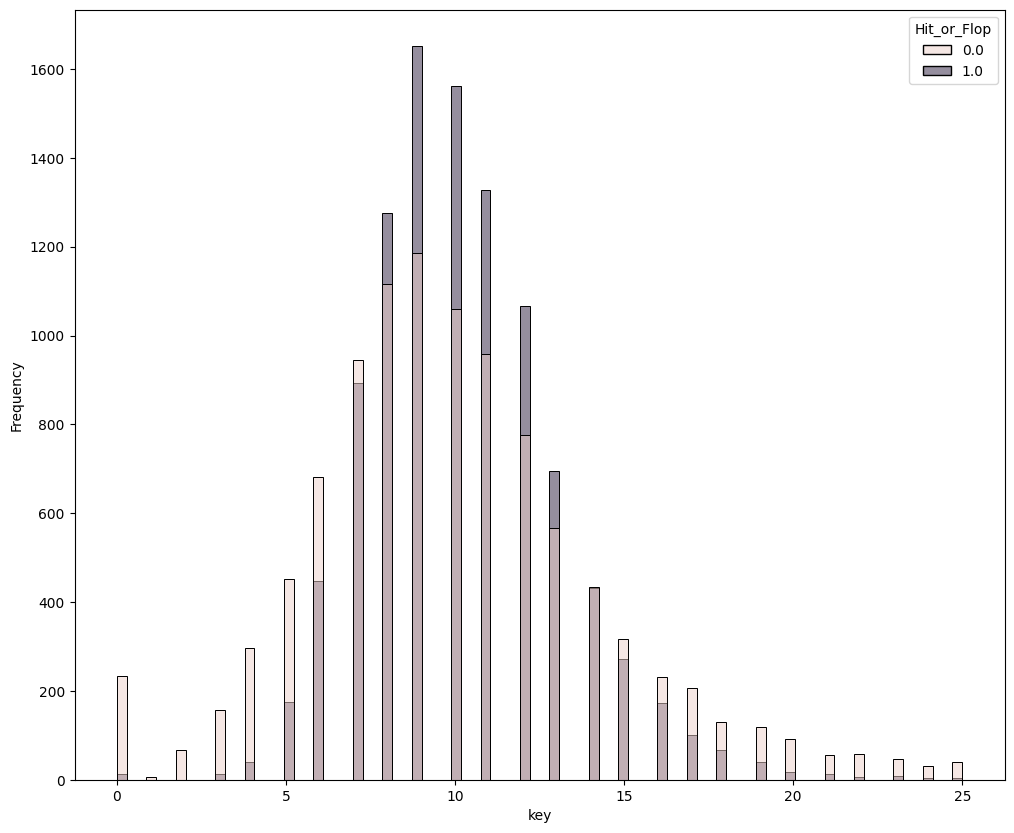

In [ ]:

fig, axes = plt.subplots(figsize = (12, 10))
plt.subplot(1,1,1)
sns.histplot(data=spotify_df, x='sections_treated_with_zero', hue='Hit_or_Flop')
plt.xlabel(xlabel = 'key')
plt.ylabel(ylabel = 'Frequency')

In [39]:
# setting explanatory variable(s) with most correlated x-variable
# x_train = spotify_df[['danceability',
#                       'energy',
#                       'key',
#                       'loudness',
#                       'mode',
#                       'speechiness',
#                       'acousticness',
#                       'instrumentalness',
#                       'liveness',
#                       'valence',
#                       'tempo',
#                       'duration_ms',
#                       'time_signature',
#                       'chorus_hit',
#                       'sections',
#                       'id'
#                       ]].copy()[ spotify_df['set'] == 'Training' ]

# # setting explanatory variable(s) with most correlated x-variable
# x_train = spotify_df[[ 'danceability',  
#                         'energy',  
#                         'energy_tuned', 
#                         'loudness',  
#                         'loudness_tuned', 
#                         'mode',  
#                         'speechiness',  
#                         'acousticness',  
#                         'acousticness_tuned', 
#                         'instrumentalness',  
#                         'liveness',  
#                         'valence',  
#                         'valence_tuned', 
#                         'tempo',  
#                         'time_signature',  
#                         'chorus_hit',  
#                         'id'                       ]].copy()[ spotify_df['set'] == 'Training' ]

# setting explanatory variable(s) with most correlated x-variable
# x_train = spotify_df[[ 'danceability',  
                      # 'tuned_combine',
                      #   'energy',  
                      #   'loudness',   
                      #   'mode',  
                      #   'speechiness',  
                      #   'acousticness',  
                      #   'instrumentalness',  
                      #   'liveness',  
                      #   'valence',  
                      #   'tempo',  
                      #   'time_signature',  
                      #   'chorus_hit',  
                      #   'famous_artist_binary',
                      #   'id'                       ]].copy()[ spotify_df['set'] == 'Training' ]

### artist scores
# setting explanatory variable(s) with most correlated x-variable
# x_train = spotify_df[[  'instrumentalness', 
#                         'tuned_combine',
#                         'danceability', 
#                         'loudness',
#                         'acousticness', 
#                         'valence',
#                         'energy', 
#                         'time_signature', 
#                         'mode',
#                         'liveness', 
#                         'chorus_hit',
#                         'tempo', 
#                         'speechiness', 
#                         'key',
#                         'Era_num',
#                         'id',
#                         'duration_treated_with_zero',
#                         'famous_artist_binary']].copy()[ spotify_df['set'] == 'Training' ]

# setting explanatory variable(s) with most correlated x-variable
# x_train = spotify_df[[  
#                       'instrumentalness',
#                         'tuned_combine',                 
#                         'danceability',                  
#                         'loudness',                      
#                         'acousticness_tuned',            
#                         'loudness_tuned',                
#                         'energy_tuned',                  
#                         'famous_artist_binary',          
#                         'acousticness',                  
#                         'valence',                       
#                         'valence_tuned',                 
#                         'danceability_tuned',            
#                         'energy',                        
#                         'duration_treated_with_zero',    
#                         'time_signature',                         
#                       ]].copy()[ spotify_df['set'] == 'Training' ]
# x_train = spotify_df[[                    
#                         'acousticness_tuned'                                  
#                       ]].copy()[ spotify_df['set'] == 'Training' ]

# x_train = spotify_df[[  
#                       'instrumentalness',
#                         'danceability',
#                         'loudness',
#                         'acousticness', 
#                         'tuned_combine',  
#                         'track_word_count',
#                         'top_word_manual',
#                         'tempo',
#                         'mode',
#                         'id',
#                         'speechiness',            
#                         'valence',      
#                         'duration_treated_with_zero',  
#                         'artist_code',
#                         'energy_tuned',   
#                         'famous_artist_binary',
#                         'time_signature',
#                         'key'
#                         # 'dance_by_00s',
#                         # 'word_count_love'              ##check later
#                         # 'chorus_hit'
#                         # 'liveness'
                                                  
#                       ]].copy()[ spotify_df['set'] == 'Training' ]

x_train = spotify_df[[  
                      'instrumentalness',
                        'danceability',
                        'loudness',
                        'acousticness', 
                        'tuned_combine',  
                        'track_word_count',
                        'top_word_manual',
                        'tempo',
                        'mode',
                        'id',
                        'speechiness',            
                        'valence',
                        # 'valence_tuned',      
                        'duration_treated_with_zero',
                        'liveness',
                        'sections',
                        'chorus_hit',
                        'Era_num',  # uncheck later
                        'energy_tuned',   
                        # 'famous_artist_binary',
                        'top_artists_100',
                        'artist_code',
                        'time_signature',
                        'key',
                        'dance_by_00s',
                        'dance_by_10s',
                        'loud_by_90s',
                        'dance_by_90s',
                        'valence_by_60s',
                        'energy_by_60s',
                        'energy_by_70s',
                        'word_count_love'              ##check later
                        # 'chorus_hit',
                        # 'liveness'
                                                  
                      ]].copy()[ spotify_df['set'] == 'Training' ]

# setting response variable
y_train = spotify_df['Hit_or_Flop'][ spotify_df['set']   == 'Training' ]

In [ ]:
spotify_df.acousticness_tuned.unique()

array([1, 0], dtype=int64)

In [ ]:

for val in x_train:
    print(f" {val} + ")

 danceability + 
 tuned_combine + 
 energy + 
 loudness + 
 mode + 
 speechiness + 
 acousticness + 
 instrumentalness + 
 liveness + 
 valence + 
 tempo + 
 time_signature + 
 chorus_hit + 
 famous_artist_binary + 
 id + 


In [ ]:
# developing training and validation sets
x_train_1, x_train_2, y_train_1, y_train_2 = train_test_split(
            x_train,
            y_train,
            random_state = 123,
            test_size    = 0.25,
            stratify     = y_train)

# Decision Tree
# declaring a hyperparameter space
criterion_range             = ["gini", "entropy"]
splitter_range              = ["best","random"]
depth_range                 = range(1, 9, 1)
leaf_range                  = range(1, 50, 1)
min_samples_split_range     = range(1,20,1)
number_of_cv_iteration      = 1000

# creating a hyperparameter grid
param_grid = {'criterion'       : criterion_range,
            'splitter'          : splitter_range,
            'max_depth'         : depth_range,
            'min_samples_leaf'  : leaf_range,
            'min_samples_split' : min_samples_split_range}


model_name = 'Pruned Decision Tree Classifier'

# INSTANTIATING a classification tree object
pdtc = DecisionTreeClassifier(random_state = 123)

# RandomizedSearchCV object
pdtc_cv = RandomizedSearchCV(estimator   = pdtc,
                                param_distributions   = param_grid,
                                # lower the cv to 3 to have a closer match 
                                # to unpruned gradient boosting score
                                cv                    = 3,
                                n_iter                = number_of_cv_iteration,
                                random_state          = 123,
                                scoring               = 'accuracy')

# FITTING the training data
pdtc_fit = pdtc_cv.fit(x_train, y_train)

# PREDICTING on new data
pdtc_train_pred = pdtc_fit.predict(x_train_1)
pdtc_test_pred = pdtc_fit.predict(x_train_2)

# saving scoring data for future use
pdtc_train_score = pdtc_fit.score(x_train_1, 
                                            y_train_1).round(4) # accuracy

pdtc_test_score  = pdtc_fit.score(x_train_2, 
                                            y_train_2).round(4)   # accuracy

pdtc_model_gap   = abs(pdtc_train_score - 
                            pdtc_test_score).round(4)

# saving AUC
pdtc_train_accuracy_score   = accuracy_score(y_true  = y_train_1,
                                    y_pred = pdtc_train_pred).round(4) # accuracy
# saving AUC
pdtc_test_accuracy_score   = accuracy_score(y_true  = y_train_2,
                                    y_pred = pdtc_test_pred).round(4) # accuracy

pdtc_best_params = pdtc_cv.best_params_

print (f"""
Model Type       : {model_name}
Combination      : {len(criterion_range) * 
                    len(splitter_range) * 
                    len(depth_range)* 
                    len(leaf_range)* 
                    len(min_samples_split_range)}
Number of iter.  : {number_of_cv_iteration}
Best params      : {pdtc_best_params}
Training Score   : {pdtc_train_score}
Testing Score    : {pdtc_test_score}
Train-Test Gap   : {pdtc_model_gap}
Train Accuracy   : {pdtc_train_accuracy_score}
Test Accuracy    : {pdtc_test_accuracy_score}
""")


Model Type       : Pruned Decision Tree Classifier
Combination      : 29792
Number of iter.  : 1000
Best params      : {'splitter': 'random', 'min_samples_split': 10, 'min_samples_leaf': 14, 'max_depth': 5, 'criterion': 'gini'}
Training Score   : 0.9268
Testing Score    : 0.9229
Train-Test Gap   : 0.0039
Train Accuracy   : 0.9268
Test Accuracy    : 0.9229



In [ ]:
# developing training and validation sets
x_train_1, x_train_2, y_train_1, y_train_2 = train_test_split(
            x_train,
            y_train,
            random_state = 123,
            test_size    = 0.25,
            stratify     = y_train)

model_name = 'Unpruned Decision Tree Classifier'

# INSTANTIATING the model object without hyperparameters
udtc = DecisionTreeClassifier(loss        = 'exponential',
                            min_samples_split = 3,
                            min_samples_leaf  = 26,
                            criterion         = 'squared_error',
                            max_depth         = 8,
                            random_state      = 123)

# FITTING the training data
udtc_fit = udtc.fit(x_train_1, y_train_1)


# PREDICTING on the response variable
udtc_train_pred = udtc_fit.predict(x_train_1)
udtc_valid_pred = udtc_fit.predict(x_train_2)

# # PREDICTING based on the testing set
# ugbc_pred = ugbc.predict(x_test)

# SCORING the results
udtc_train_score = udtc.score(x_train_1, y_train_1).round(4) # using R-square
udtc_test_score  = udtc.score(x_train_2, y_train_2).round(4)   # using R-square
udtc_gap         = abs(udtc_train_score - udtc_test_score).round(4)

# SCORING the results (auc)
udtc_train_auc = accuracy_score(y_true  = y_train_1,
                                y_pred = udtc_train_pred).round(decimals = 4)

udtc_valid_auc = accuracy_score(y_true  = y_train_2,
                                y_pred = udtc_valid_pred).round(decimals = 4)

# unpacking the confusion matrix
udtc_tn, \
udtc_fp, \
udtc_fn, \
udtc_tp = confusion_matrix(y_true = y_train_2, y_pred = udtc_valid_pred).ravel()

print (f"""
    Model Type       : {model_name}
    Training ACCURACY: {udtc_train_score}
    Testing ACCURACY : {udtc_test_score}
    Train-Test Gap   : {udtc_gap}
    AUC Train        : {udtc_train_auc}
    AUC Test         : {udtc_valid_auc}
    ==========================================
    Confusion Matrix:   
                    True Negatives : {udtc_tn}
                    False Positives: {udtc_fp}
                    False Negatives: {udtc_fn}
                    True Positives : {udtc_tp}
    """)


TypeError: __init__() got an unexpected keyword argument 'loss'

In [ ]:
# developing training and validation sets
x_train_1, x_train_2, y_train_1, y_train_2 = train_test_split(
            x_train,
            y_train,
            random_state = 123,
            test_size    = 0.25,
            stratify     = y_train)


#Gradient Boosting
# declaring a hyperparameter space
criterion_range             = ['friedman_mse',  'squared_error']
loss_range                  = ['exponential']
depth_range                 = range(1, 9, 1)
leaf_range                  = range(1, 50, 1)
min_samples_split_range     = range(1,20,1)
number_of_cv_iteration      = 10

# creating a hyperparameter grid
param_grid = {'criterion'       : criterion_range,
            'loss'              : loss_range,
            'max_depth'         : depth_range,
            'min_samples_leaf'  : leaf_range,
            'min_samples_split' : min_samples_split_range}


model_name = 'Pruned Gradient Boosting Classifier'

# INSTANTIATING a classification tree object
pgbc = GradientBoostingClassifier(random_state = 123)

# RandomizedSearchCV object
pgbc_cv = RandomizedSearchCV(estimator   = pgbc,
                                param_distributions   = param_grid,
                                # lower the cv to 3 to have a closer match 
                                # to unpruned gradient boosting score
                                cv                    = 3,
                                n_iter                = number_of_cv_iteration,
                                random_state          = 123,
                                scoring               = 'accuracy')

# FITTING the training data
pgbc_fit = pgbc_cv.fit(x_train, y_train)

# PREDICTING on new data
pgbc_train_pred = pgbc_fit.predict(x_train_1)
pgbc_test_pred = pgbc_fit.predict(x_train_2)

# saving scoring data for future use
pgbc_train_score = pgbc_fit.score(x_train_1, 
                                            y_train_1).round(4) # accuracy

pgbc_test_score  = pgbc_fit.score(x_train_2, 
                                            y_train_2).round(4)   # accuracy

pgbc_model_gap   = abs(pgbc_train_score - 
                            pgbc_test_score).round(4)

# saving AUC
pgbc_train_accuracy_score   = accuracy_score(y_true  = y_train_1,
                                    y_pred = pgbc_train_pred).round(4) # accuracy
# saving AUC
pgbc_test_accuracy_score   = accuracy_score(y_true  = y_train_2,
                                    y_pred = pgbc_test_pred).round(4) # accuracy

pgbc_best_params = pgbc_cv.best_params_

print (f"""
Model Type       : {model_name}
Combination      : {len(criterion_range) * 
                    len(loss_range) * 
                    len(depth_range)* 
                    len(leaf_range)* 
                    len(min_samples_split_range)}
Number of iter.  : {number_of_cv_iteration}
Best params      : {pgbc_best_params}
Training Score   : {pgbc_train_score}
Testing Score    : {pgbc_test_score}
Train-Test Gap   : {pgbc_model_gap}
Train Accuracy   : {pgbc_train_accuracy_score}
Test Accuracy    : {pgbc_test_accuracy_score}
""")


Model Type       : Pruned Gradient Boosting Classifier
Combination      : 14896
Number of iter.  : 10
Best params      : {'min_samples_split': 3, 'min_samples_leaf': 26, 'max_depth': 8, 'loss': 'exponential', 'criterion': 'squared_error'}
Training Score   : 0.9249
Testing Score    : 0.9266
Train-Test Gap   : 0.0017
Train Accuracy   : 0.9249
Test Accuracy    : 0.9266



In [ ]:
# ORIGINAL CODE
# developing training and validation sets
x_train_1, x_train_2, y_train_1, y_train_2 = train_test_split(
            x_train,
            y_train,
            random_state = 123,
            test_size    = 0.25,
            stratify     = y_train)

#Gradient Boosting
# specifying a model name
model_name = 'Unpruned Gradient Boosting Classifier'

# INSTANTIATING the model object without hyperparameters
ugbc = GradientBoostingClassifier(loss          = 'exponential',
                                    min_samples_split= 1,
                                    min_samples_leaf= 3,
                                    criterion     = 'squared_error',
                                    max_depth     = 8,
                                    random_state  = 123)

# FITTING the training data
ugbc_fit = ugbc.fit(x_train_1, y_train_1)


# PREDICTING on the response variable
ugbc_train_pred = ugbc_fit.predict(x_train_1)
ugbc_valid_pred = ugbc_fit.predict(x_train_2)

# # PREDICTING based on the testing set
# ugbc_pred = ugbc.predict(x_test)

# SCORING the results
ugbc_train_score = ugbc.score(x_train_1, y_train_1).round(4) # using R-square
ugbc_test_score  = ugbc.score(x_train_2, y_train_2).round(4)   # using R-square
ugbc_gap         = abs(ugbc_train_score - ugbc_test_score).round(4)

# SCORING the results (auc)
ugbc_train_auc = accuracy_score(y_true  = y_train_1,
                                y_pred = ugbc_train_pred).round(decimals = 4)

ugbc_valid_auc = accuracy_score(y_true  = y_train_2,
                                y_pred = ugbc_valid_pred).round(decimals = 4)

# unpacking the confusion matrix
ugbc_tn, \
ugbc_fp, \
ugbc_fn, \
ugbc_tp = confusion_matrix(y_true = y_train_2, y_pred = ugbc_valid_pred).ravel()

print (f"""
    Model Type       : {model_name}
    Training ACCURACY: {ugbc_train_score}
    Testing ACCURACY : {ugbc_test_score}
    Train-Test Gap   : {ugbc_gap}
    AUC Train        : {ugbc_train_auc}
    AUC Test         : {ugbc_valid_auc}
    ==========================================
    Confusion Matrix:   
                    True Negatives : {ugbc_tn}
                    False Positives: {ugbc_fp}
                    False Negatives: {ugbc_fn}
                    True Positives : {ugbc_tp}
    """)


    Model Type       : Unpruned Gradient Boosting Classifier
    Training ACCURACY: 0.9975
    Testing ACCURACY : 0.9932
    Train-Test Gap   : 0.0043
    AUC Train        : 0.9975
    AUC Test         : 0.9932
    Confusion Matrix:   
                    True Negatives : 2566
                    False Positives: 0
                    False Negatives: 35
                    True Positives : 2538
    


In [ ]:
# LOOP GRIADIENT BOOSTING
best_test_score = 0
for i in range(1, 50):
    for j in range(1,50):
        for k in range(1,9):
            
            # developing training and validation sets
            x_train_1, x_train_2, y_train_1, y_train_2 = train_test_split(
                        x_train,
                        y_train,
                        random_state = 123,
                        test_size    = 0.25,
                        stratify     = y_train)

            #Gradient Boosting
            # specifying a model name
            model_name = 'Unpruned Gradient Boosting Classifier'

            # INSTANTIATING the model object without hyperparameters
            ugbc = GradientBoostingClassifier(loss          = 'exponential',
                                                min_samples_split= i,
                                                min_samples_leaf= j,
                                                criterion     = 'squared_error',
                                                max_depth     = k,
                                                random_state  = 123)

            # FITTING the training data
            ugbc_fit = ugbc.fit(x_train_1, y_train_1)


            # PREDICTING on the response variable
            ugbc_train_pred = ugbc_fit.predict(x_train_1)
            ugbc_valid_pred = ugbc_fit.predict(x_train_2)

            # # PREDICTING based on the testing set
            # ugbc_pred = ugbc.predict(x_test)

            # SCORING the results
            ugbc_train_score = ugbc.score(x_train_1, y_train_1).round(4) # using R-square
            ugbc_test_score  = ugbc.score(x_train_2, y_train_2).round(4)   # using R-square
            ugbc_gap         = abs(ugbc_train_score - ugbc_test_score).round(4)

            # SCORING the results (auc)
            ugbc_train_auc = accuracy_score(y_true  = y_train_1,
                                            y_pred = ugbc_train_pred).round(decimals = 4)

            ugbc_valid_auc = accuracy_score(y_true  = y_train_2,
                                            y_pred = ugbc_valid_pred).round(decimals = 4)
            
                            # unpacking the confusion matrix
            ugbc_tn, \
            ugbc_fp, \
            ugbc_fn, \
            ugbc_tp = confusion_matrix(y_true = y_train_2, y_pred = ugbc_valid_pred).ravel()
            
            if ugbc_valid_auc > best_test_score:
                best_test_score = ugbc_valid_auc
                print (f"""
                    Model Type       : {model_name}
                    min_sample_split : {i}
                    min_samples_leaf : {j}
                    max_depth        : {k}
                    Training ACCURACY: {ugbc_train_score}
                    Testing ACCURACY : {ugbc_test_score}
                    Train-Test Gap   : {ugbc_gap}
                    AUC Train        : {ugbc_train_auc}
                    AUC Test         : {ugbc_valid_auc}
                    
                    Confusion Matrix:   
                                        True Negatives : {ugbc_tn}
                                        False Positives: {ugbc_fp}
                                        False Negatives: {ugbc_fn}
                                        True Positives : {ugbc_tp}
                    """)
            
                



                    Model Type       : Unpruned Gradient Boosting Classifier
                    min_sample_split : 1
                    min_samples_leaf : 1
                    max_depth        : 1
                    Training ACCURACY: 0.9933
                    Testing ACCURACY : 0.9932
                    Train-Test Gap   : 0.0001
                    AUC Train        : 0.9933
                    AUC Test         : 0.9932
                    
                    Confusion Matrix:   
                                        True Negatives : 2566
                                        False Positives: 0
                                        False Negatives: 35
                                        True Positives : 2538
                    


KeyboardInterrupt: 

In [ ]:
# !pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 7.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
### LIGHT GBM
import lightgbm as lgb

# developing training and validation sets
x_train_1, x_train_2, y_train_1, y_train_2 = train_test_split(
            x_train,
            y_train,
            random_state = 123,
            test_size    = 0.25,
            stratify     = y_train)

#Gradient Boosting
# declaring a hyperparameter space
number_of_cv_iteration      = 10


# creating a hyperparameter grid
param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
                'max_depth': [3, 5, 7, 9, -1],
                'n_estimators': [100, 200, 300, 400, 500],
                'num_leaves': [15, 31, 63, 127],
                'min_child_samples': [1, 5, 10, 20, 30],
                'subsample': [0.5, 0.7, 0.9, 1.0],
                'colsample_bytree': [0.5, 0.7, 0.9, 1.0],
                'reg_alpha': [0, 0.1, 0.5, 1, 2, 5],
                'reg_lambda': [0, 0.1, 0.5, 1, 2, 5],
                'random_state': [123]
}

model_name = 'Pruned Light Gradient Boosting Classifier'

# INSTANTIATING a classification tree object
lgbc = lgb.LGBMClassifier(random_state = 123)

lgbc_cv = RandomizedSearchCV(estimator   = lgbc,
                                param_distributions   = param_grid,
                                # lower the cv to 3 to have a closer match 
                                # to unpruned gradient boosting score
                                cv                    = 3,
                                n_iter                = number_of_cv_iteration,
                                random_state          = 123,
                                scoring               = 'accuracy')



lgbc_fit = lgbc_cv.fit(x_train, y_train)

# PREDICTING on new data
lgbc_train_pred = lgbc_fit.predict(x_train_1)
lgbc_test_pred = lgbc_fit.predict(x_train_2)

# saving scoring data for future use
lgbc_train_score = lgbc_fit.score(x_train_1, 
                                            y_train_1).round(4) # accuracy

lgbc_test_score  = lgbc_fit.score(x_train_2, 
                                            y_train_2).round(4)   # accuracy

lgbc_model_gap   = abs(lgbc_train_score - 
                            lgbc_test_score).round(4)

# saving AUC
lgbc_train_accuracy_score   = accuracy_score(y_true  = y_train_1,
                                    y_pred = lgbc_train_pred).round(4) # accuracy
# saving AUC
lgbc_test_accuracy_score   = accuracy_score(y_true  = y_train_2,
                                    y_pred = lgbc_test_pred).round(4) # accuracy

lgbc_best_params = lgbc_cv.best_params_

print (f"""
Model Type       : {model_name}
Number of iter.  : {number_of_cv_iteration}
Best params      : {lgbc_best_params}
Training Score   : {lgbc_train_score}
Testing Score    : {lgbc_test_score}
Train-Test Gap   : {lgbc_model_gap}
Train Accuracy   : {lgbc_train_accuracy_score}
Test Accuracy    : {lgbc_test_accuracy_score}
""")



Model Type       : Pruned Light Gradient Boosting Classifier
Number of iter.  : 10
Best params      : {'subsample': 0.5, 'reg_lambda': 1, 'reg_alpha': 0.5, 'random_state': 123, 'num_leaves': 63, 'n_estimators': 500, 'min_child_samples': 1, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Training Score   : 0.9487
Testing Score    : 0.9508
Train-Test Gap   : 0.0021
Train Accuracy   : 0.9487
Test Accuracy    : 0.9508



In [42]:
# ORIGINAL CODE

best_test_score = 0
for i in range(5, 10,1):
    for j in range(1,50):
        for k in range(7,9):
            for l in range(300,500, 50):

                # developing training and validation sets
                x_train_1, x_train_2, y_train_1, y_train_2 = train_test_split(
                            x_train,
                            y_train,
                            random_state = 123,
                            test_size    = 0.25,
                            stratify     = y_train)

                #Gradient Boosting
                # specifying a model name
                model_name = 'Unpruned Light Gradient Boosting Classifier'

                # INSTANTIATING the model object without hyperparameters
                lugbc = lgb.LGBMClassifier(
                    subsample = i/10,
                    reg_lambda = 1,
                    reg_alpha = 0.5,
                    random_state = 123,
                    num_leaves = 63,
                    n_estimators = l,
                    min_child_samples = j,
                    max_depth = k,
                    learning_rate = 0.1,
                    colsample_bytree = 1.0)

                # FITTING the training data
                lugbc_fit = lugbc.fit(x_train_1, y_train_1)


                # PREDICTING on the response variable
                lugbc_train_pred = lugbc_fit.predict(x_train_1)
                lugbc_valid_pred = lugbc_fit.predict(x_train_2)

                # # PREDICTING based on the testing set
                # ugbc_pred = ugbc.predict(x_test)

                # SCORING the results
                lugbc_train_score = lugbc.score(x_train_1, y_train_1).round(4) # using R-square
                lugbc_test_score  = lugbc.score(x_train_2, y_train_2).round(4)   # using R-square
                lugbc_gap         = abs(lugbc_train_score - lugbc_test_score).round(4)

                # SCORING the results (auc)
                lugbc_train_auc = accuracy_score(y_true  = y_train_1,
                                                y_pred = lugbc_train_pred).round(decimals = 4)

                lugbc_valid_auc = accuracy_score(y_true  = y_train_2,
                                                y_pred = lugbc_valid_pred).round(decimals = 4)

                # unpacking the confusion matrix
                lugbc_tn, \
                lugbc_fp, \
                lugbc_fn, \
                lugbc_tp = confusion_matrix(y_true = y_train_2, y_pred = lugbc_valid_pred).ravel()
                
                if lugbc_valid_auc > best_test_score:
                    best_test_score = lugbc_valid_auc
                    print (f"""
                        Model Type       : {model_name}
                        subsample : {i/10}
                        min_child_samples : {j}
                        max_depth        : {k}
                        estimator        : {l}
                        Training ACCURACY: {lugbc_train_score}
                        Testing ACCURACY : {lugbc_test_score}
                        Train-Test Gap   : {lugbc_gap}
                        AUC Train        : {lugbc_train_auc}
                        AUC Test         : {lugbc_valid_auc}
                        ==========================================
                        Confusion Matrix:   
                                        True Negatives : {lugbc_tn}
                                        False Positives: {lugbc_fp}
                                        False Negatives: {lugbc_fn}
                                        True Positives : {lugbc_tp}
                        """)


                        Model Type       : Unpruned Light Gradient Boosting Classifier
                        subsample : 0.5
                        min_child_samples : 1
                        max_depth        : 7
                        estimator        : 300
                        Training ACCURACY: 0.9842
                        Testing ACCURACY : 0.8541
                        Train-Test Gap   : 0.1301
                        AUC Train        : 0.9842
                        AUC Test         : 0.8541
                        Confusion Matrix:   
                                        True Negatives : 2119
                                        False Positives: 447
                                        False Negatives: 303
                                        True Positives : 2270
                        

                        Model Type       : Unpruned Light Gradient Boosting Classifier
                        subsample : 0.5
                        min_child_sample

KeyboardInterrupt: 

In [27]:
# developing training and validation sets
x_train_1, x_train_2, y_train_1, y_train_2 = train_test_split(
            x_train,
            y_train,
            random_state = 123,
            test_size    = 0.25,
            stratify     = y_train)

#Gradient Boosting
# specifying a model name
model_name = 'Unpruned Light Gradient Boosting Classifier'

# INSTANTIATING the model object without hyperparameters
lugbc = lgb.LGBMClassifier(
    subsample = 0.9,
    reg_lambda = 5,
    reg_alpha = 0,
    random_state = 123,
    num_leaves = 31,
    n_estimators = 450,
    min_child_samples = 3,
    max_depth = 7,
    learning_rate = 0.1,
    colsample_bytree = 0.5)

# FITTING the training data
lugbc_fit = lugbc.fit(x_train_1, y_train_1)


# PREDICTING on the response variable
lugbc_train_pred = lugbc_fit.predict(x_train_1)
lugbc_valid_pred = lugbc_fit.predict(x_train_2)

# # PREDICTING based on the testing set
# ugbc_pred = ugbc.predict(x_test)

# SCORING the results
lugbc_train_score = lugbc.score(x_train_1, y_train_1).round(4) # using R-square
lugbc_test_score  = lugbc.score(x_train_2, y_train_2).round(4)   # using R-square
lugbc_gap         = abs(lugbc_train_score - lugbc_test_score).round(4)

# SCORING the results (auc)
lugbc_train_auc = accuracy_score(y_true  = y_train_1,
                                y_pred = lugbc_train_pred).round(decimals = 4)

lugbc_valid_auc = accuracy_score(y_true  = y_train_2,
                                y_pred = lugbc_valid_pred).round(decimals = 4)

# unpacking the confusion matrix
lugbc_tn, \
lugbc_fp, \
lugbc_fn, \
lugbc_tp = confusion_matrix(y_true = y_train_2, y_pred = lugbc_valid_pred).ravel()
                

print (f"""
Model Type       : {model_name}
Training ACCURACY: {lugbc_train_score}
Testing ACCURACY : {lugbc_test_score}
Train-Test Gap   : {lugbc_gap}
AUC Train        : {lugbc_train_auc}
AUC Test         : {lugbc_valid_auc}
==========================================
Confusion Matrix:   
                True Negatives : {lugbc_tn}
                False Positives: {lugbc_fp}
                False Negatives: {lugbc_fn}
                True Positives : {lugbc_tp}""")


Model Type       : Unpruned Light Gradient Boosting Classifier
Training ACCURACY: 0.9487
Testing ACCURACY : 0.8399
Train-Test Gap   : 0.1088
AUC Train        : 0.9487
AUC Test         : 0.8399
Confusion Matrix:   
                True Negatives : 2089
                False Positives: 477
                False Negatives: 346
                True Positives : 2227


In [43]:
# Set the model for export
model = lugbc #<<<<< CHOOSE YOUR MODEL HERE

x_test = spotify_df[['instrumentalness',
                        'danceability',
                        'loudness',
                        'acousticness', 
                        'tuned_combine',  
                        'track_word_count',
                        'top_word_manual',
                        'tempo',
                        'mode',
                        'id',
                        'speechiness',            
                        'valence',
                        # 'valence_tuned',      
                        'duration_treated_with_zero',
                        'liveness',
                        'sections',
                        'chorus_hit',
                        'Era_num',  # uncheck later
                        'energy_tuned',   
                        # 'famous_artist_binary',
                        'top_artists_100',
                        'artist_code',
                        'time_signature',
                        'key',
                        'dance_by_00s',
                        'dance_by_10s',
                        'loud_by_90s',
                        'dance_by_90s',
                        'valence_by_60s',
                        'energy_by_60s',
                        'energy_by_70s',
                        'word_count_love'
                      ]].copy()[ spotify_df['set'] == 'Testing' ]

# # setting x_test
# x_test  = spotify_df.drop(columns=["Transported_New", "Transported", "Name", "set"], axis=1).copy()[ spotify_df['set'] == 'Testing' ]


# PREDICTING on new data
model_pred = model.predict(x_test)

# checking results
if model == lugbc:
    print("You are exporting Unpruned Gradient Boosting Classifier Result.")
    model_valid_pred = lugbc_valid_pred

model_pred

NotFittedError: Estimator not fitted, call fit before exploiting the model.

In [ ]:
# calling the visual_cm function
visual_cm(true_y = y_train_2,
          pred_y = model_valid_pred,
          labels = ['Famous', 'Not Famous'])

NameError: name 'visual_cm' is not defined

<br><br>
<h3>The Confusion Matrix</h3><br>
The confusion matrix reads as follows:<br><br>

~~~
                   |
  True Negatives   |  False Positives
(correct) 846      |  (incorrect)233
                   |
-------------------|------------------
                   |
  False Negatives  |  True Positives
(incorrect)194     |  (correct)901
                   |
~~~

<br><br>
In terms of our model:<br><br>

~~~
                                                 |
 PREDICTED:Will be not transported (Transport=0) |  PREDICTED: Will be transported (Transport=1)
  ACTUAL: Will not be transported (Transport=0)  |  ACTUAL:    Will not be transported  (Transport=0)
                                                 |
-------------------------------------------------|-----------------------------------------------
                                                 |
PREDICTED: Will not be transported  (Transport=0)|  PREDICTED: Will be transported (Transport=1)
  ACTUAL:  Will be transported (Transport=1)     |      ACTUAL:    Will be transported (Transport=1)
                                                 |  
~~~

In [ ]:
# plotting feature importance
plot_feature_importances(model,
                         train = x_train_1,
                         export = False)

NameError: name 'model' is not defined

In [ ]:
# saving predictions with their respective Ids from the test set
predictions = pd.DataFrame(data = { 'id' : spotify_test['id'],
                                    'Hit_or_Flop' : model_pred               } )

# checking the results
predictions.head(n = 5)

,id,Hit_or_Flop
0,39665,0.0
1,36086,0.0
2,7392,0.0
3,7900,0.0
4,35323,1.0


In [ ]:
# sending predictions to .csv file
predictions.to_csv(path_or_buf = 'submission_Team_3_14.csv',
                   index = False)

<br>